## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For Ml model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [2]:
cd=pd.read_csv('pokemon.csv')

In [3]:
cd.head()

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1               1   
1             2.0            1.0  ...             88.1               2   
2             2.0            1.0  ...             88.1               3   
3             1.0            1.0  ...             88.1               4   
4             1.0            1.0  ...             88.1               5   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 41 columns]

In [4]:
cd.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [5]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [6]:
cd.describe()

against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250000       0.000000      0.250000        0.250000   
25%         1.000000       0.500000      0.500000        1.000000   
50%         1.000000       1.000000      1.000000        1.000000   
75%         1.000000       1.000000      2.000000        1.000000   
max         4.000000       4.000000      4.000000        4.000000   

       against_ghost  against_grass  ...    height_m          hp  \
count     801.000000     801.000000  ...  781.000000  801.000000   
mean        0.985019       1.034020  ...    1.163892   68.958801   
std         0.558256       0.788896  ...    1.080326   26.576015   
min         0.000000       0.250000  ...    0.100000    1.000000   
25%         1.000000       0.500000  ...    0.600000   50.000000   
50%         1.000000       1.000000  ...    1.000000   65.000000   
75%         1.000000       1.000000  ...    1.500000   80.000000   
max         4.000000       4.000000  ...   14.500000  255.000000   

       percentage_male  pokedex_number   sp_attack  sp_defense       speed  \
count       703.000000      801.000000  801.000000  801.000000  801.000000   
mean         55.155761      401.000000   71.305868   70.911361   66.334582   
std          20.261623      231.373075   32.353826   27.942501   28.907662   
min           0.000000        1.000000   10.000000   20.000000    5.000000   
25%          50.000000      201.000000   45.000000   50.000000   45.000000   
50%          50.000000      401.000000   65.000000   66.000000   65.000000   
75%          50.000000      601.000000   91.000000   90.000000   85.000000   
max         100.000000      801.000000  194.000000  230.000000  180.000000   

        weight_kg  generation  is_legendary  
count  781.000000  801.000000    801.000000  
mean    61.378105    3.690387      0.087391  
std    109.354766    1.930420      0.282583  
min      0.100000    1.000000      0.000000  
25%      9.000000    2.000000      0.000000  
50%     27.300000    4.000000      0.000000  
75%     64.800000    5.000000      0.000000  
max    999.900000    7.000000      1.000000  

[8 rows x 34 columns]

In [7]:
cd.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


There are some null values present.

<Axes: >

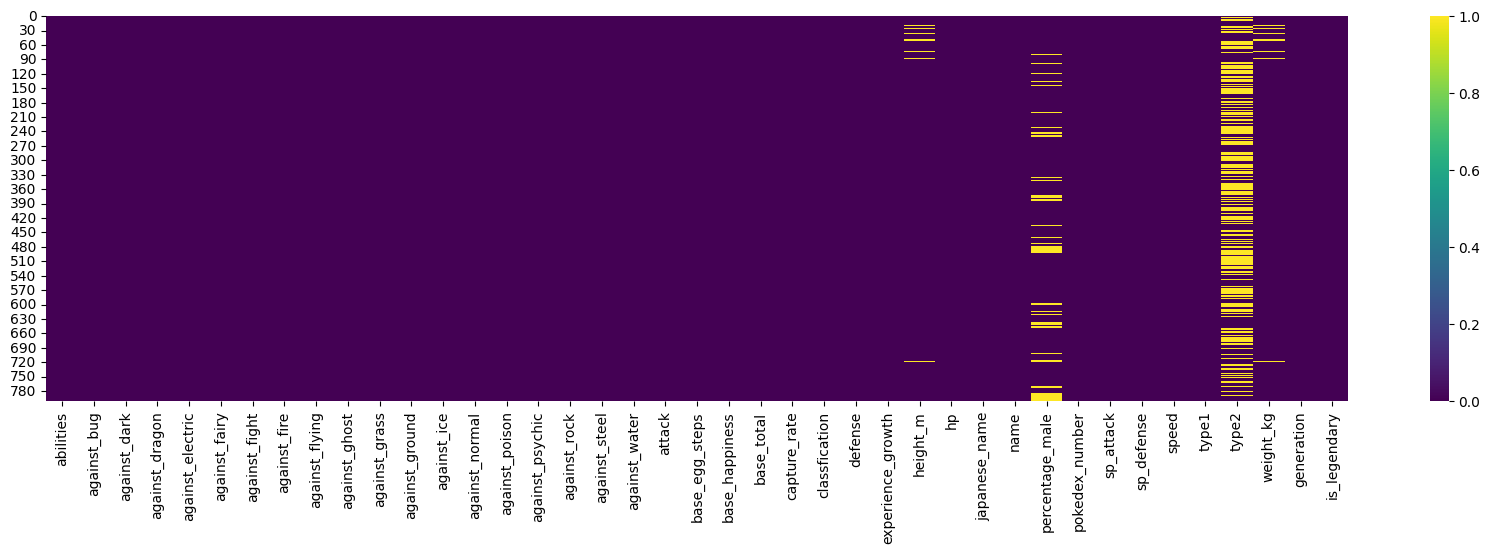

In [10]:
plt.figure(figsize=(21,5))
sns.heatmap(cd.isnull(),cmap='viridis')

In [ ]:
# Fill missing values
cd['height_m'].fillna(cd['height_m'].mean(), inplace=True)
cd['weight_kg'].fillna(cd['weight_kg'].mean(), inplace=True)
cd['percentage_male'].fillna(-1, inplace=True)  # Use -1 to indicate genderless Pokémon
# Fill missing type2 values with type1
cd['type2'] = cd['type2'].fillna('')


Some pokemon does not have type2. So, we will replace null value with empty space.


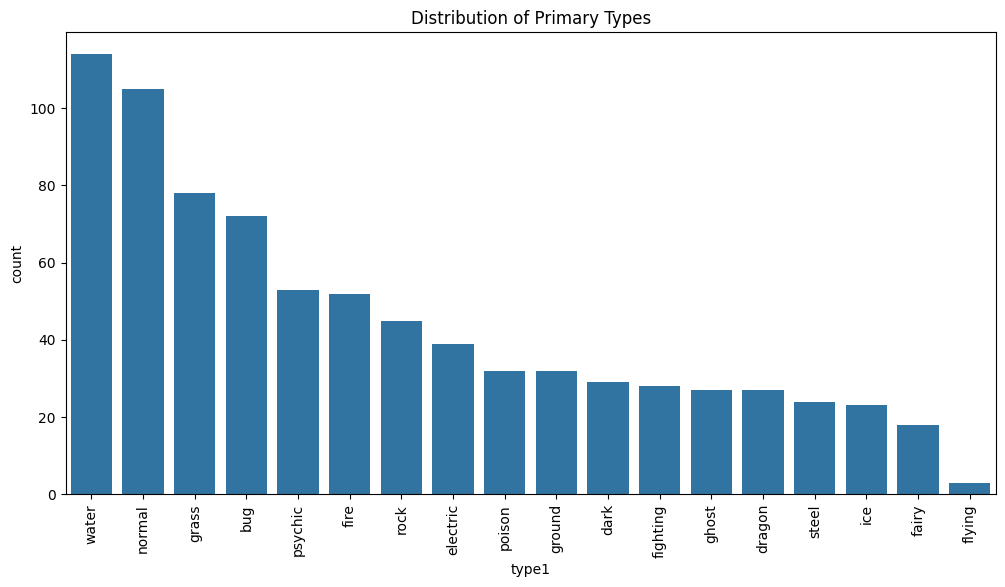

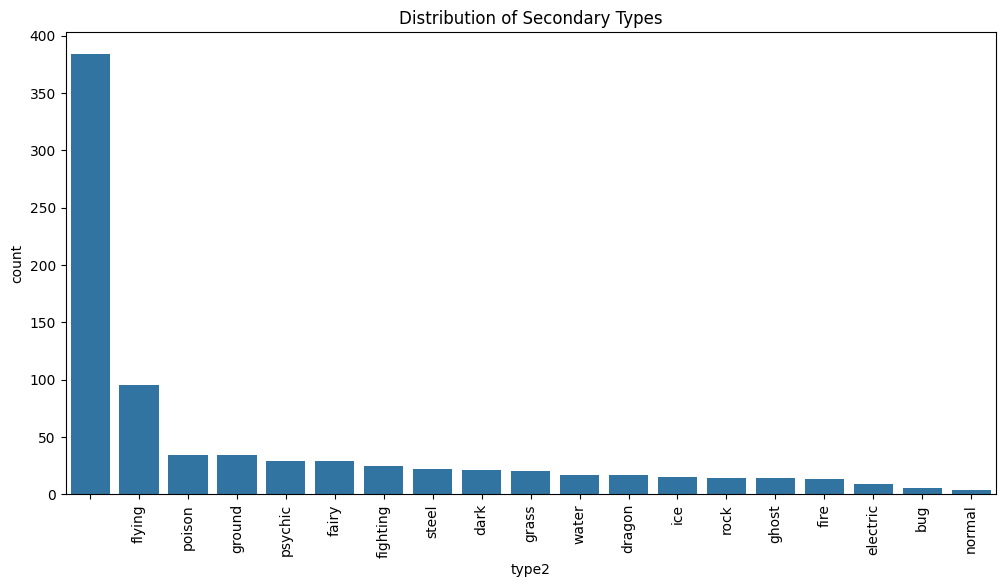

In [9]:
# Distribution of Primary Types
plt.figure(figsize=(12, 6))
sns.countplot(x='type1', data=cd, order=cd['type1'].value_counts().index)
plt.title('Distribution of Primary Types')
plt.xticks(rotation=90)
plt.show()

# Distribution of Secondary Types
plt.figure(figsize=(12, 6))
sns.countplot(x='type2', data=cd, order=cd['type2'].value_counts().index)
plt.title('Distribution of Secondary Types')
plt.xticks(rotation=90)
plt.show()


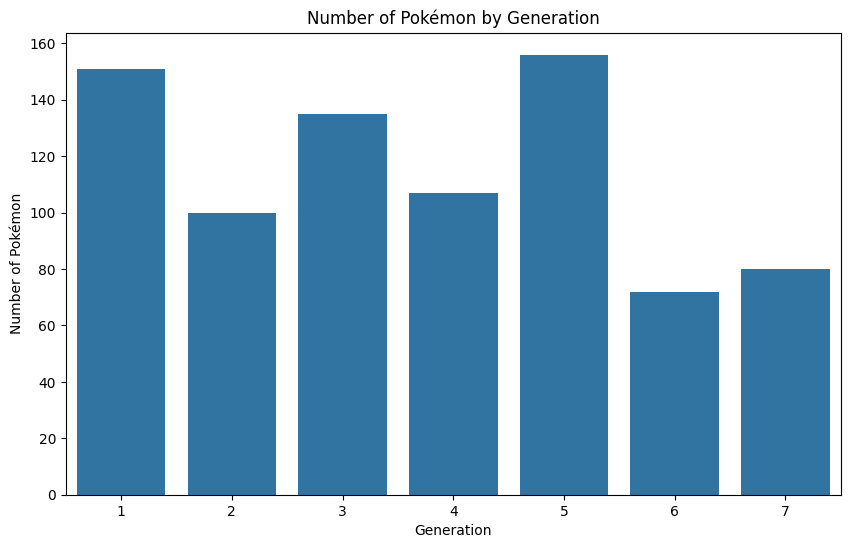

In [10]:
generation_counts = cd['generation'].value_counts().sort_index()

# Plot the number of Pokémon by generation
plt.figure(figsize=(10, 6))
sns.barplot(x=generation_counts.index, y=generation_counts.values)
plt.title('Number of Pokémon by Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Pokémon')
plt.show()

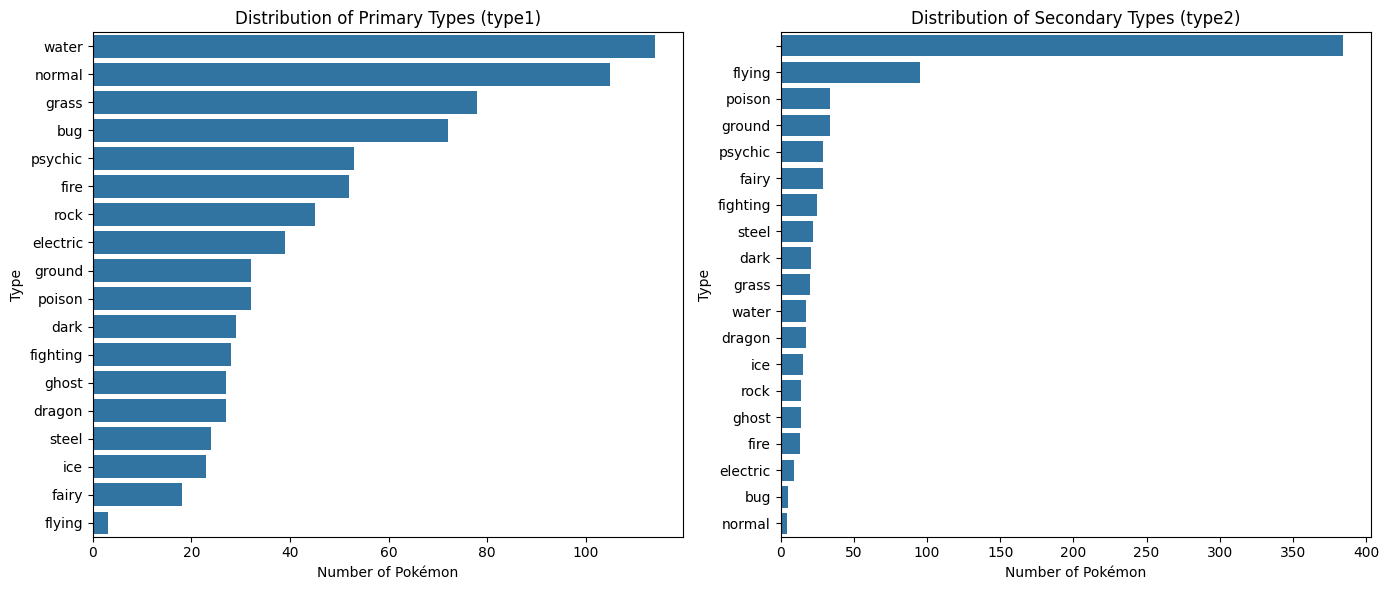

In [11]:
# Count the occurrences of each type for type1 and type2
type1_counts = cd['type1'].value_counts().sort_values(ascending=False)
type2_counts = cd['type2'].value_counts().sort_values(ascending=False)

# Plot the distribution of type1
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=type1_counts.values, y=type1_counts.index)
plt.title('Distribution of Primary Types (type1)')
plt.xlabel('Number of Pokémon')
plt.ylabel('Type')

# Plot the distribution of type2
plt.subplot(1, 2, 2)
sns.barplot(x=type2_counts.values, y=type2_counts.index)
plt.title('Distribution of Secondary Types (type2)')
plt.xlabel('Number of Pokémon')
plt.ylabel('Type')

plt.tight_layout()
plt.show()


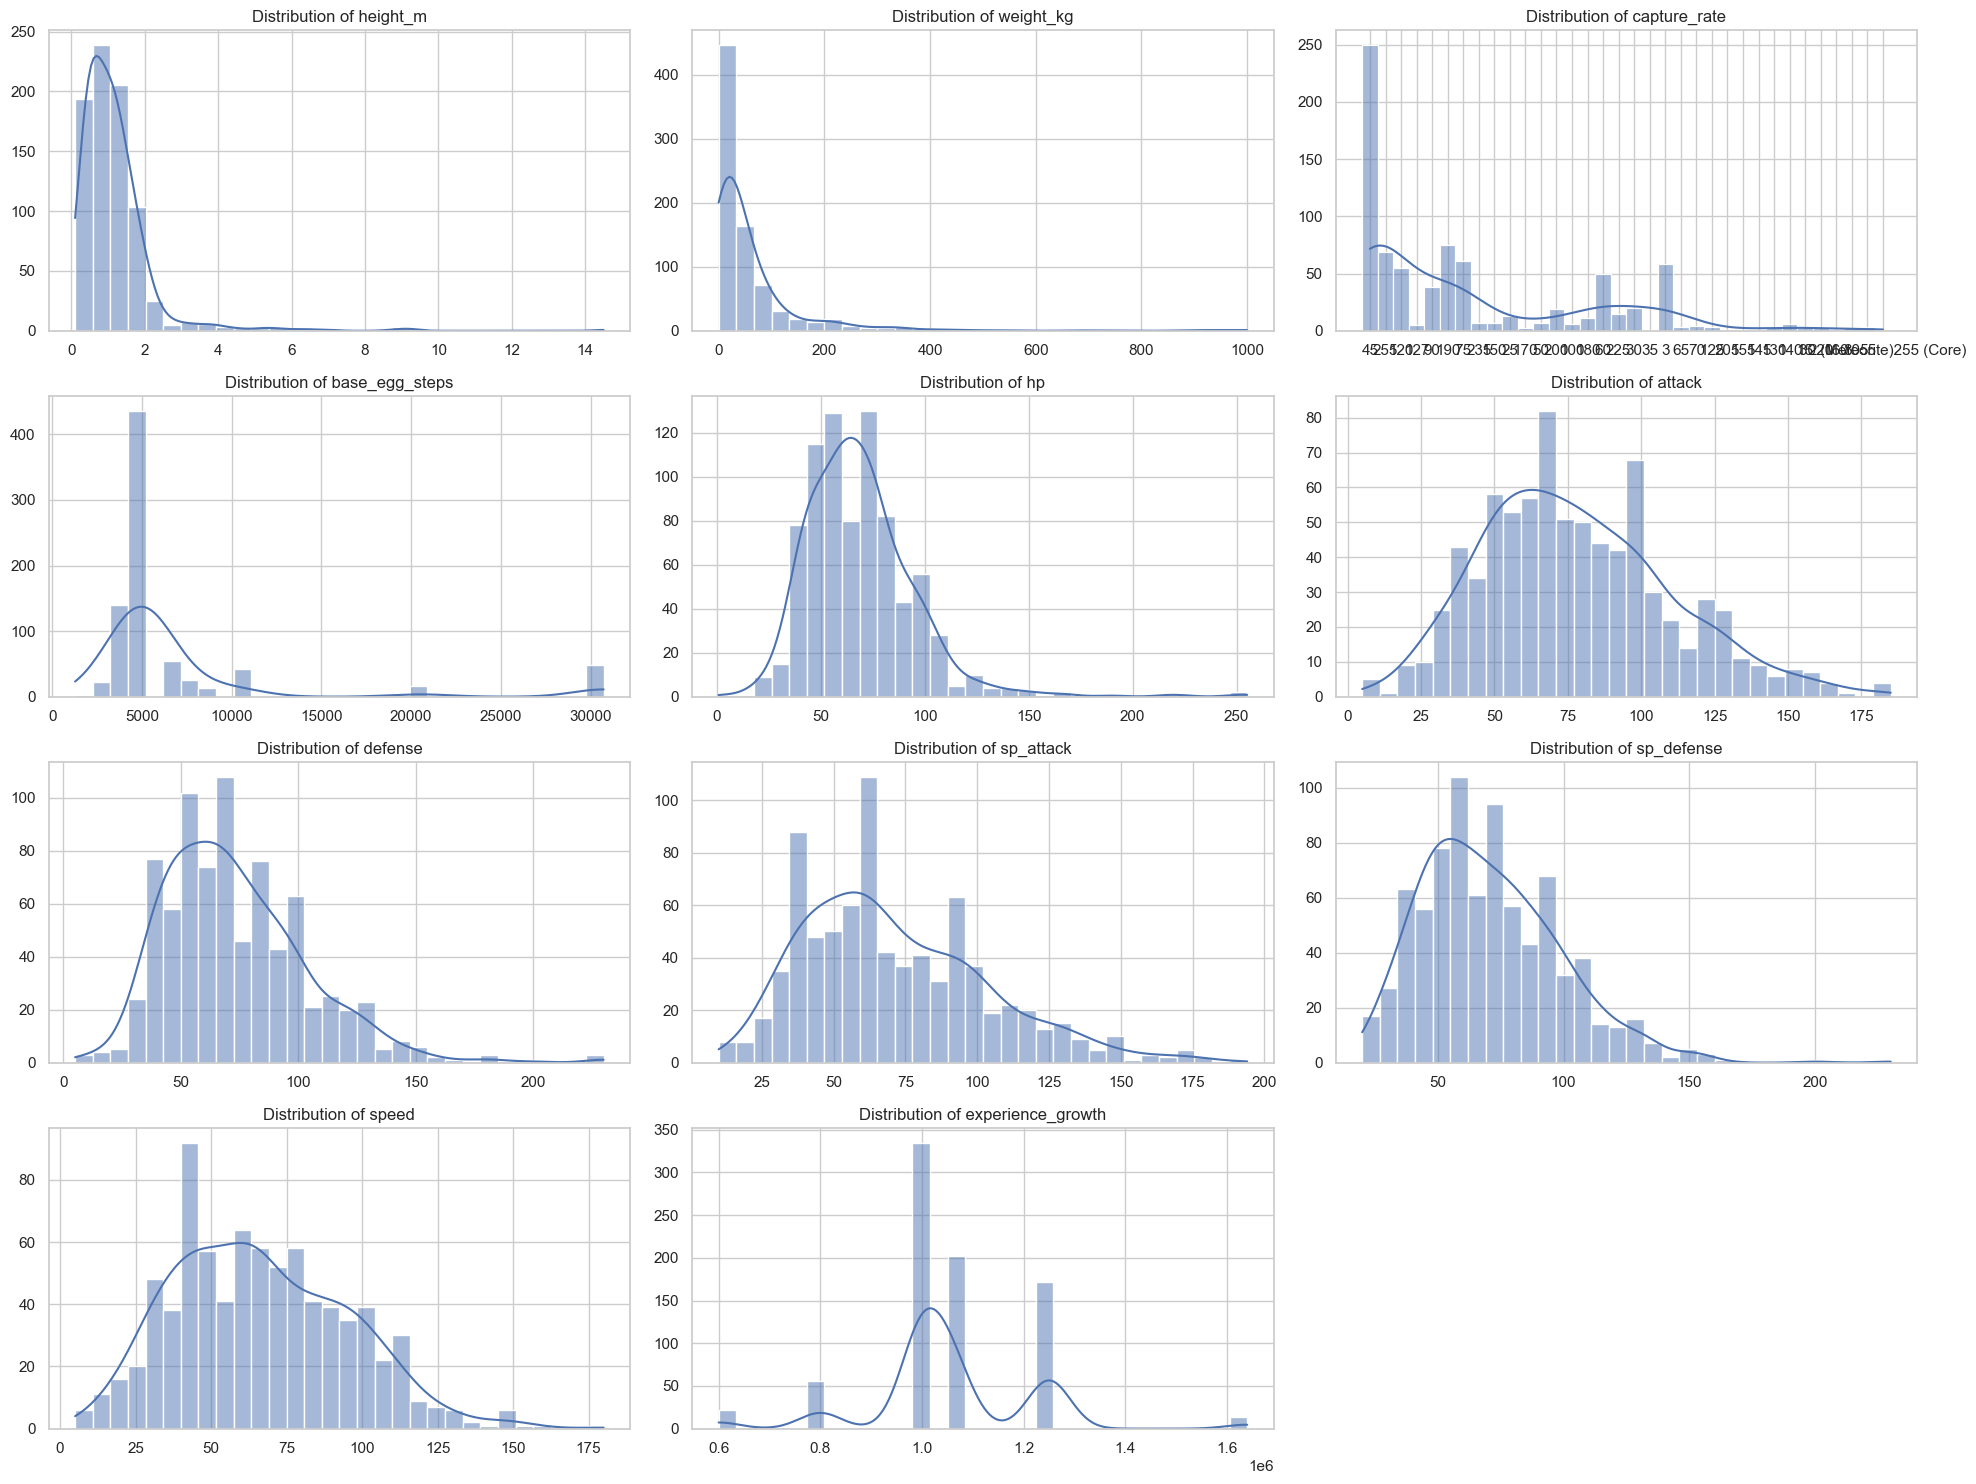

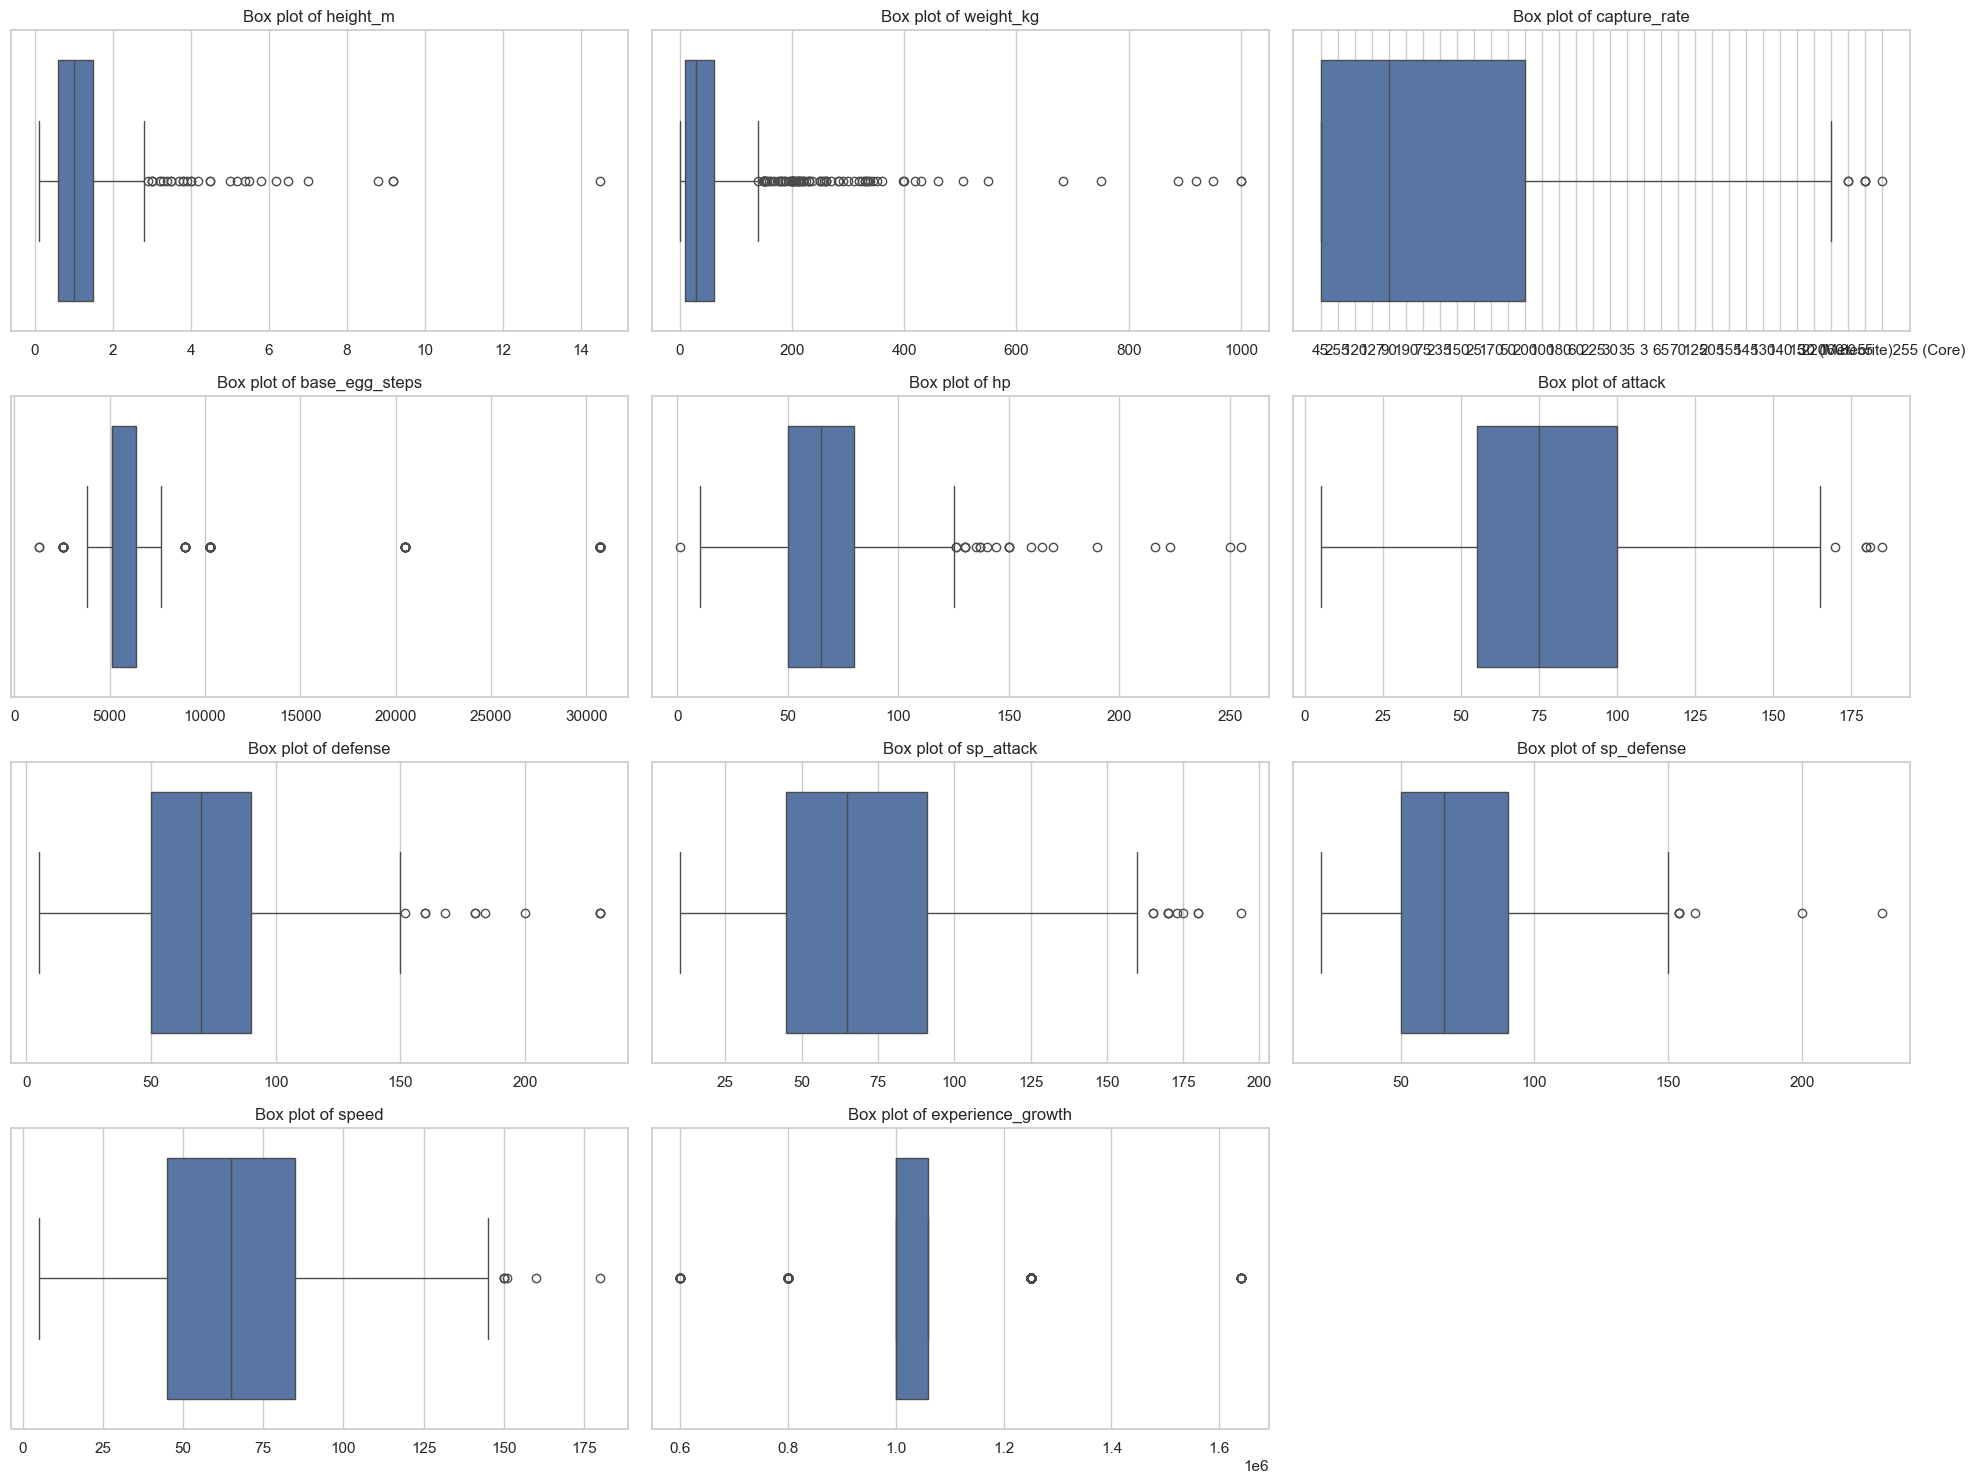

In [12]:
sns.set(style="whitegrid")

# List of attributes to visualize
attributes = ['height_m', 'weight_kg', 'capture_rate', 'base_egg_steps', 
              'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'experience_growth']

# Create histograms for each attribute
plt.figure(figsize=(20, 15))
for i, attribute in enumerate(attributes, 1):
    plt.subplot(4, 3, i)
    sns.histplot(cd[attribute].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# Create box plots for each attribute
plt.figure(figsize=(20, 15))
for i, attribute in enumerate(attributes, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=cd[attribute].dropna())
    plt.title(f'Box plot of {attribute}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [13]:
cd['name'].nunique()

801

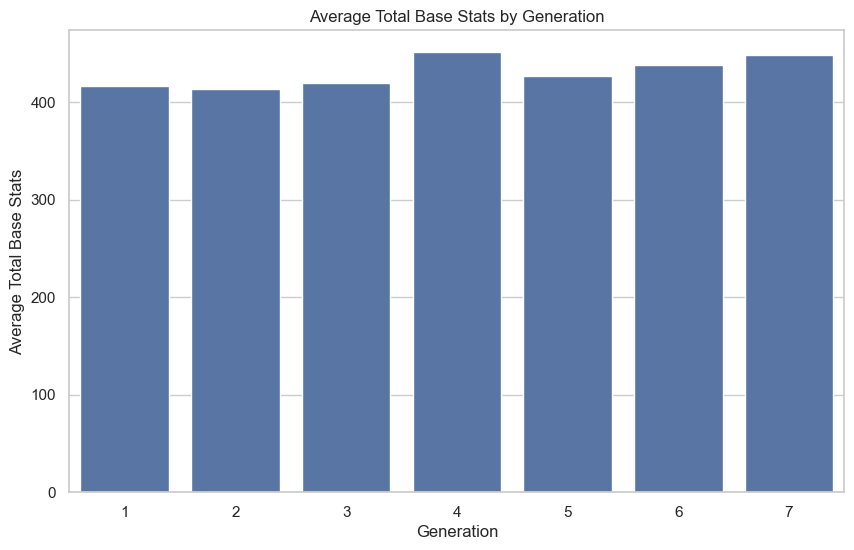

In [14]:
# Calculate the total base stats for each Pokémon
cd['total_base_stats'] = cd[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].sum(axis=1)

# Group by generation and calculate the average total base stats
generation_stats = cd.groupby('generation')['total_base_stats'].mean().sort_index()

# Plot the average total base stats by generation
plt.figure(figsize=(10, 6))
sns.barplot(x=generation_stats.index, y=generation_stats.values)
plt.title('Average Total Base Stats by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Total Base Stats')
plt.show()

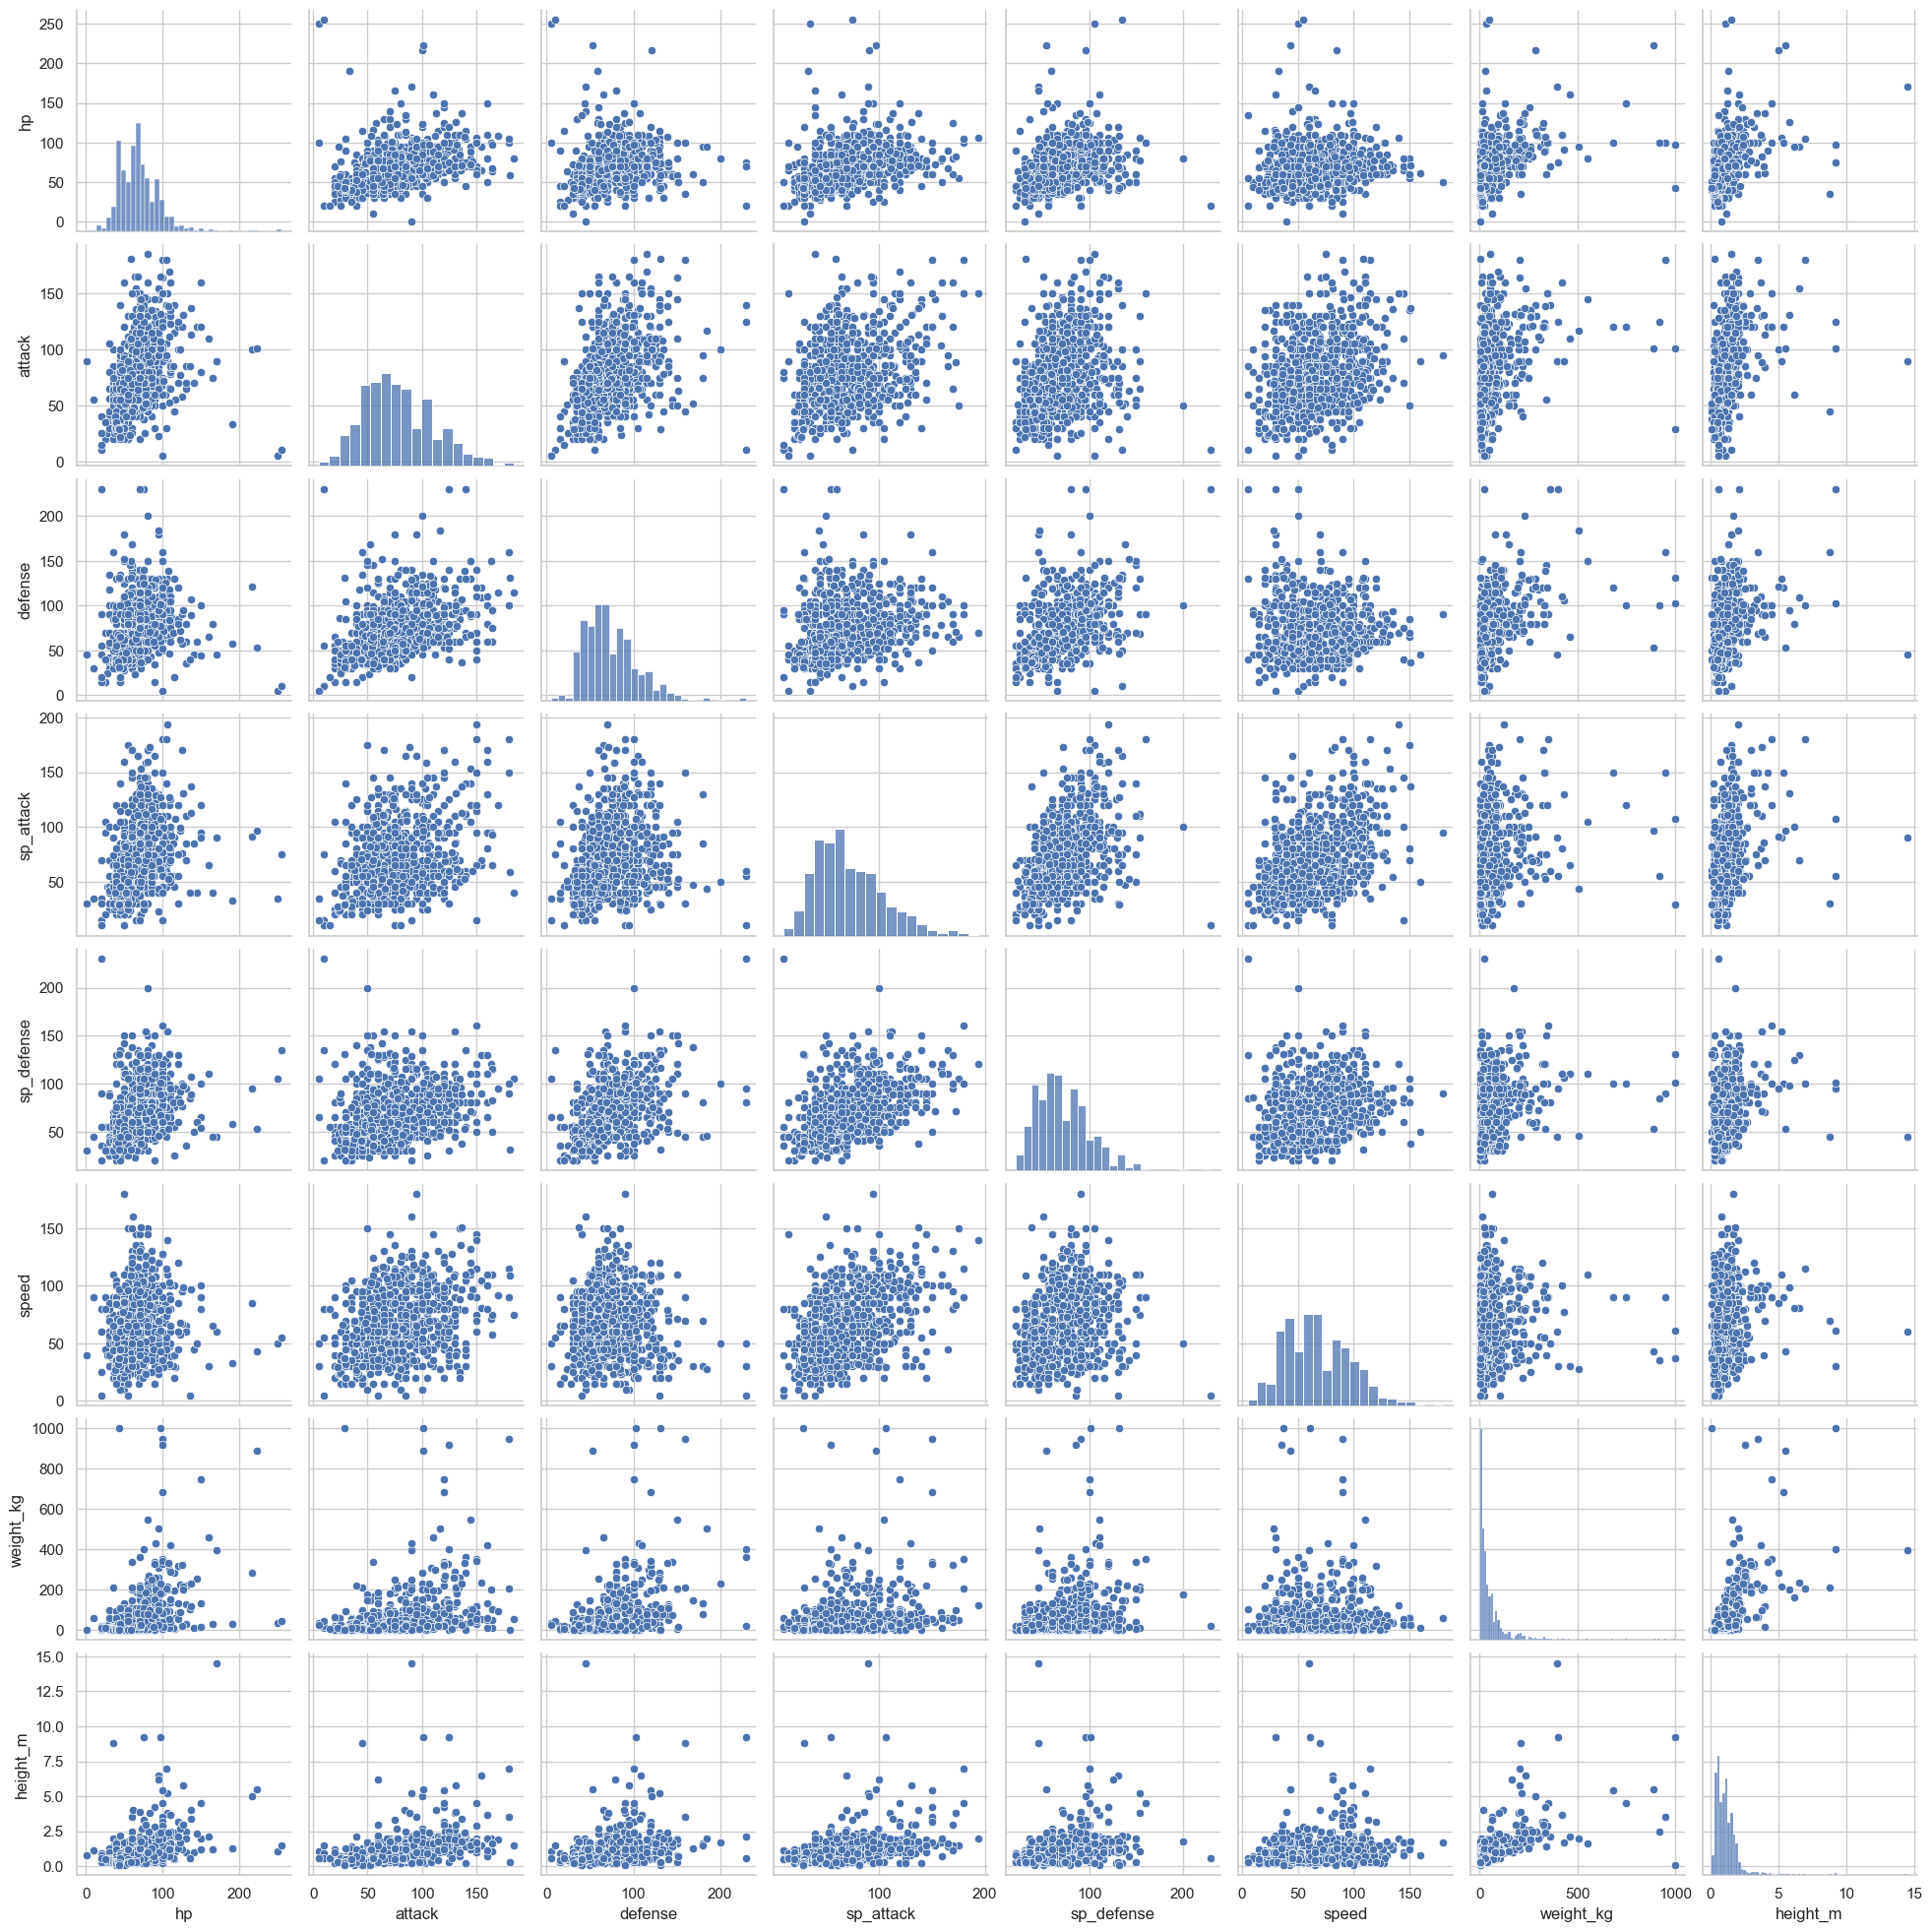

In [15]:
attributes = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'height_m']

# Plot pair plots
sns.pairplot(cd[attributes])
plt.show()

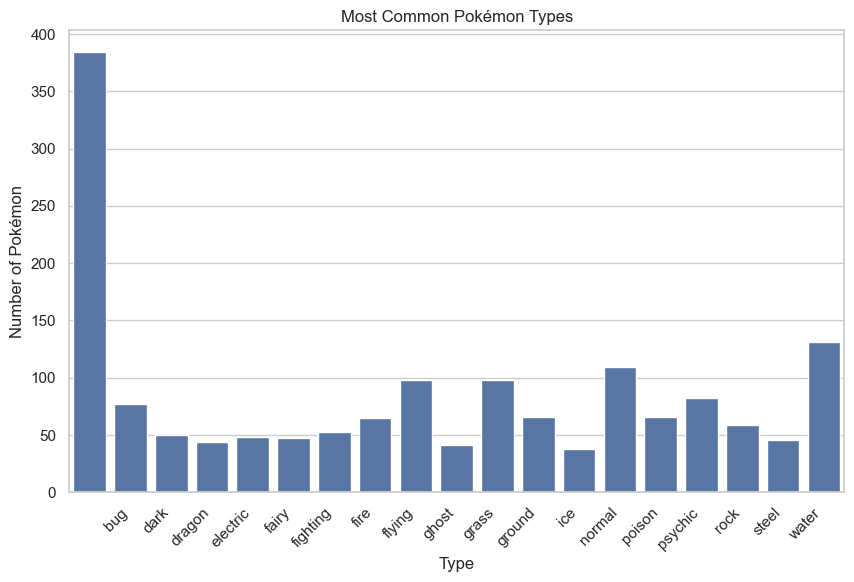

In [16]:

# Count occurrences of primary and secondary types
primary_type_counts = cd['type1'].value_counts()
secondary_type_counts = cd['type2'].value_counts()

# Combine counts for primary and secondary types
combined_type_counts = primary_type_counts.add(secondary_type_counts, fill_value=0)

# Plot the most common primary types
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_type_counts.index, y=combined_type_counts.values)
plt.title('Most Common Pokémon Types')
plt.xlabel('Type')
plt.ylabel('Number of Pokémon')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1200x800 with 0 Axes>

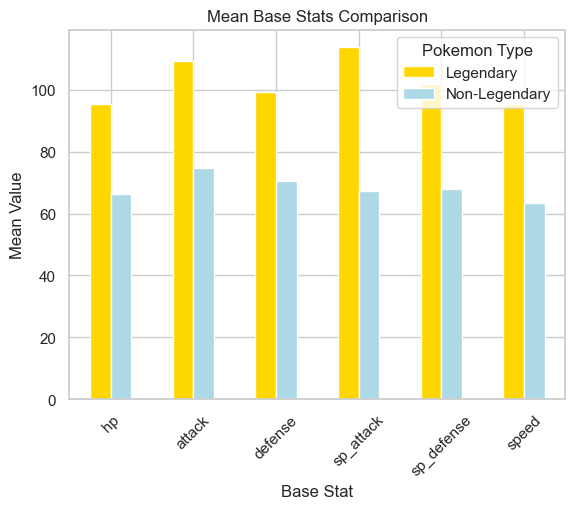

In [17]:
# Separate legendary and non-legendary Pokémon
legendary_pokemon = cd[cd['is_legendary'] == 1]
non_legendary_pokemon = cd[cd['is_legendary'] == 0]

# List of base stats
base_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Calculate mean base stats for legendary and non-legendary Pokémon
legendary_mean_stats = legendary_pokemon[base_stats].mean()
non_legendary_mean_stats = non_legendary_pokemon[base_stats].mean()

# Combine mean stats into a DataFrame
mean_stats_df = pd.DataFrame({'Legendary': legendary_mean_stats, 'Non-Legendary': non_legendary_mean_stats})

# Plot mean base stats comparison using bar plot
plt.figure(figsize=(12, 8))
mean_stats_df.plot(kind='bar', color=['gold', 'lightblue'])
plt.title('Mean Base Stats Comparison')
plt.xlabel('Base Stat')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Pokemon Type')
plt.show()


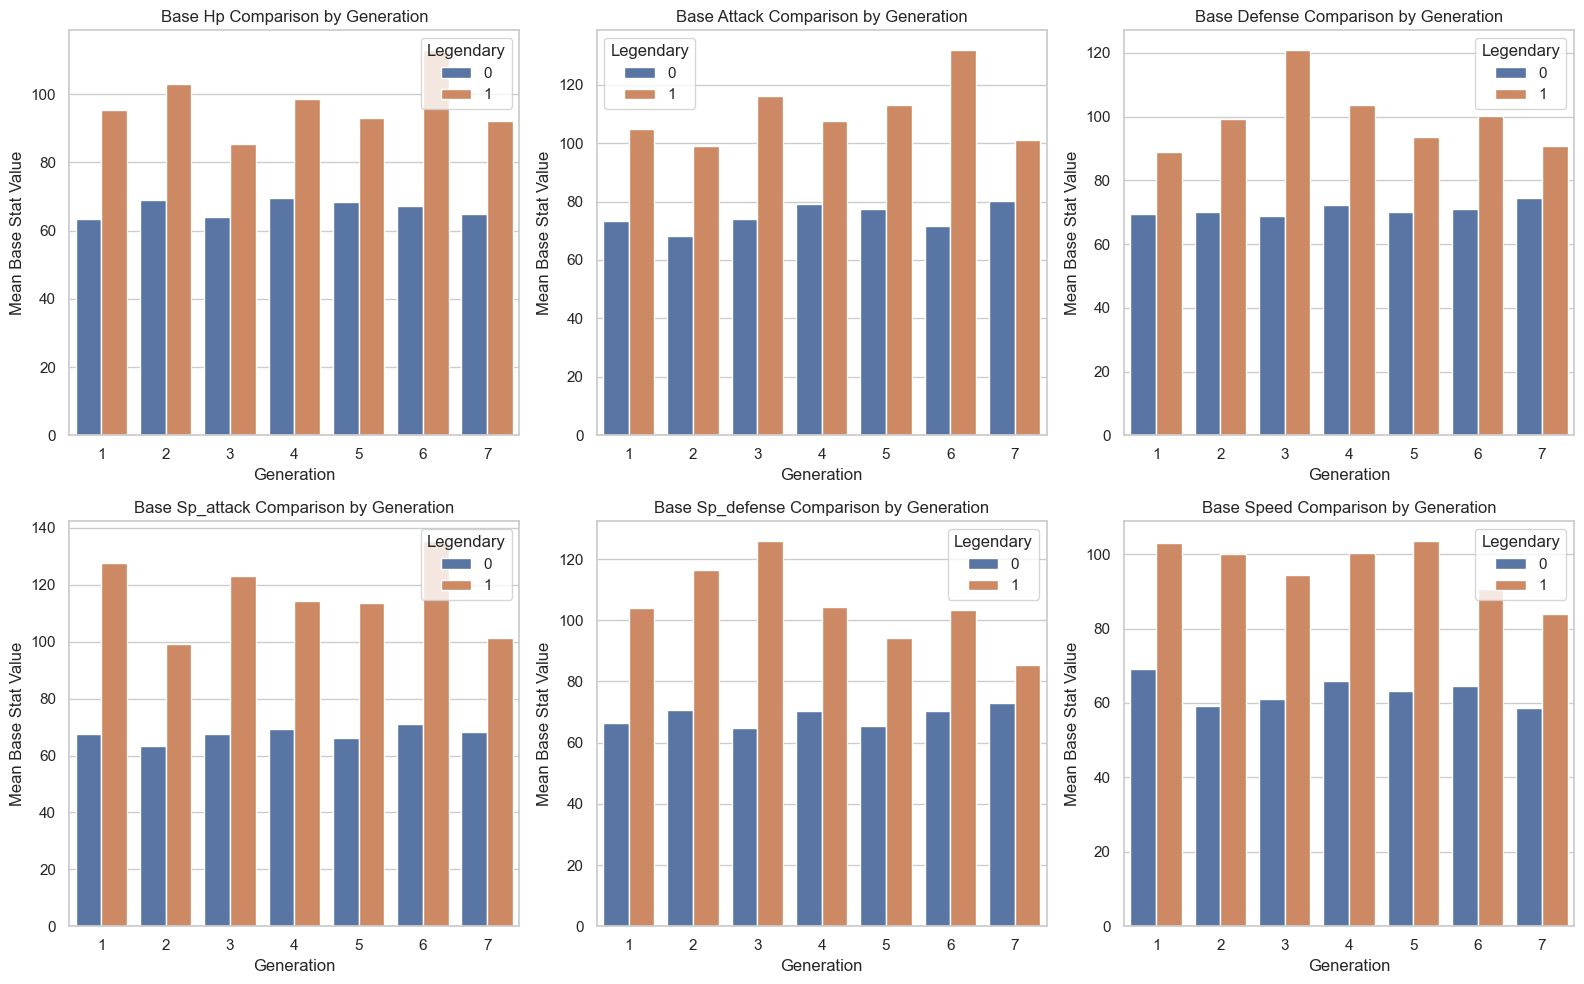

In [18]:
base_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Create subplots for each base stat
plt.figure(figsize=(16, 10))

for i, stat in enumerate(base_stats, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='generation', y=stat, hue='is_legendary', data=cd, errorbar=None)
    plt.title(f'Base {stat.capitalize()} Comparison by Generation')
    plt.xlabel('Generation')
    plt.ylabel('Mean Base Stat Value')
    plt.legend(title='Legendary')

plt.tight_layout()
plt.show()

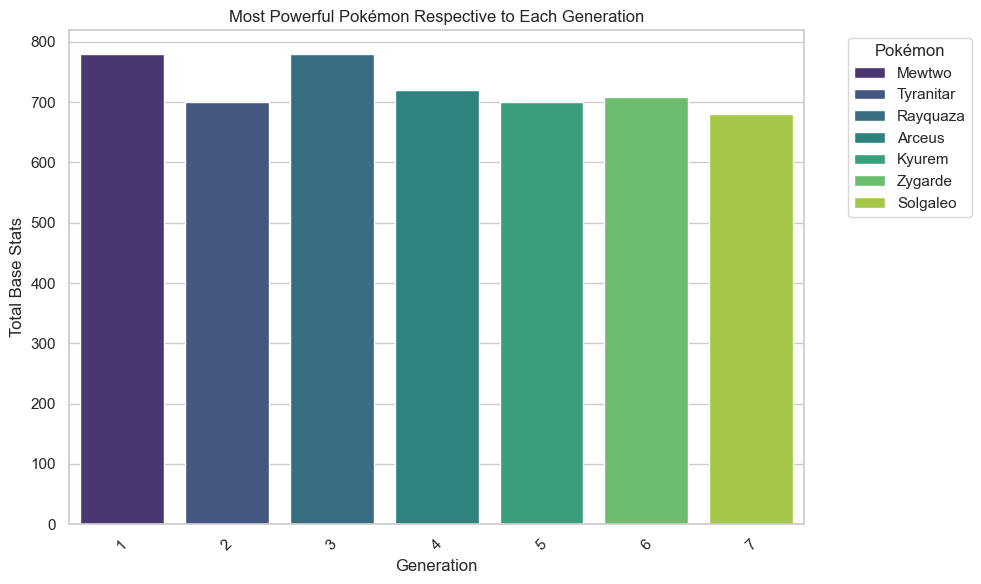

In [19]:
# Calculate total base stats for each Pokémon
cd['total_base_stats'] = cd[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].sum(axis=1)

# Group Pokémon by generation
grouped_by_generation = cd.groupby('generation')

# Find the most powerful Pokémon for each generation
most_powerful_pokemon = grouped_by_generation.apply(lambda x: x.loc[x['total_base_stats'].idxmax()])

# Plot the most powerful Pokémon for each generation
plt.figure(figsize=(10, 6))
sns.barplot(x='generation', y='total_base_stats', hue='name', data=most_powerful_pokemon, palette='viridis')
plt.title('Most Powerful Pokémon Respective to Each Generation')
plt.xlabel('Generation')
plt.ylabel('Total Base Stats')
plt.legend(title='Pokémon', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


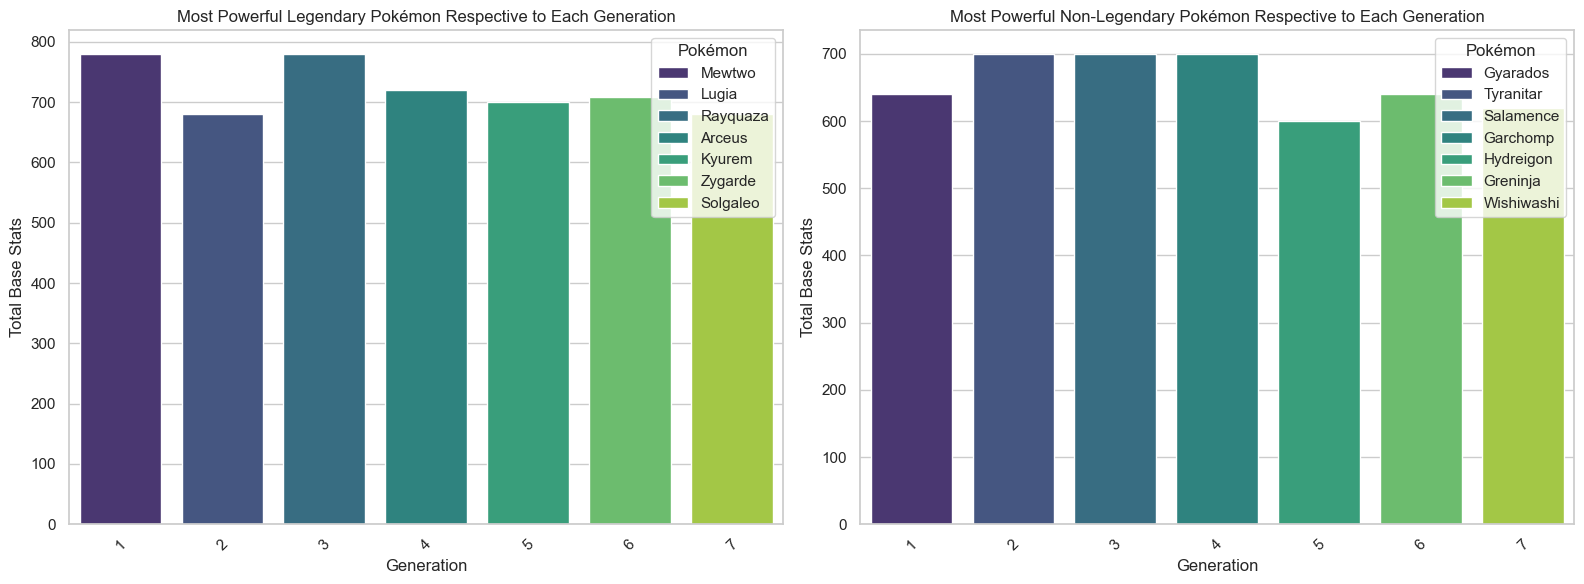

In [20]:
# Calculate total base stats for each Pokémon
cd['total_base_stats'] = cd[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].sum(axis=1)

# Find the most powerful Pokémon for legendary and non-legendary categories
most_powerful_legendary = cd[cd['is_legendary'] == 1].groupby('generation').apply(lambda x: x.loc[x['total_base_stats'].idxmax()])
most_powerful_non_legendary = cd[cd['is_legendary'] == 0].groupby('generation').apply(lambda x: x.loc[x['total_base_stats'].idxmax()])

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the most powerful legendary Pokémon for each generation
sns.barplot(x='generation', y='total_base_stats', hue='name', data=most_powerful_legendary, ax=axes[0], palette='viridis')
axes[0].set_title('Most Powerful Legendary Pokémon Respective to Each Generation')
axes[0].set_xlabel('Generation')
axes[0].set_ylabel('Total Base Stats')
axes[0].legend(title='Pokémon')
axes[0].tick_params(axis='x', rotation=45)

# Plot the most powerful non-legendary Pokémon for each generation
sns.barplot(x='generation', y='total_base_stats', hue='name', data=most_powerful_non_legendary, ax=axes[1], palette='viridis')
axes[1].set_title('Most Powerful Non-Legendary Pokémon Respective to Each Generation')
axes[1].set_xlabel('Generation')
axes[1].set_ylabel('Total Base Stats')
axes[1].legend(title='Pokémon')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


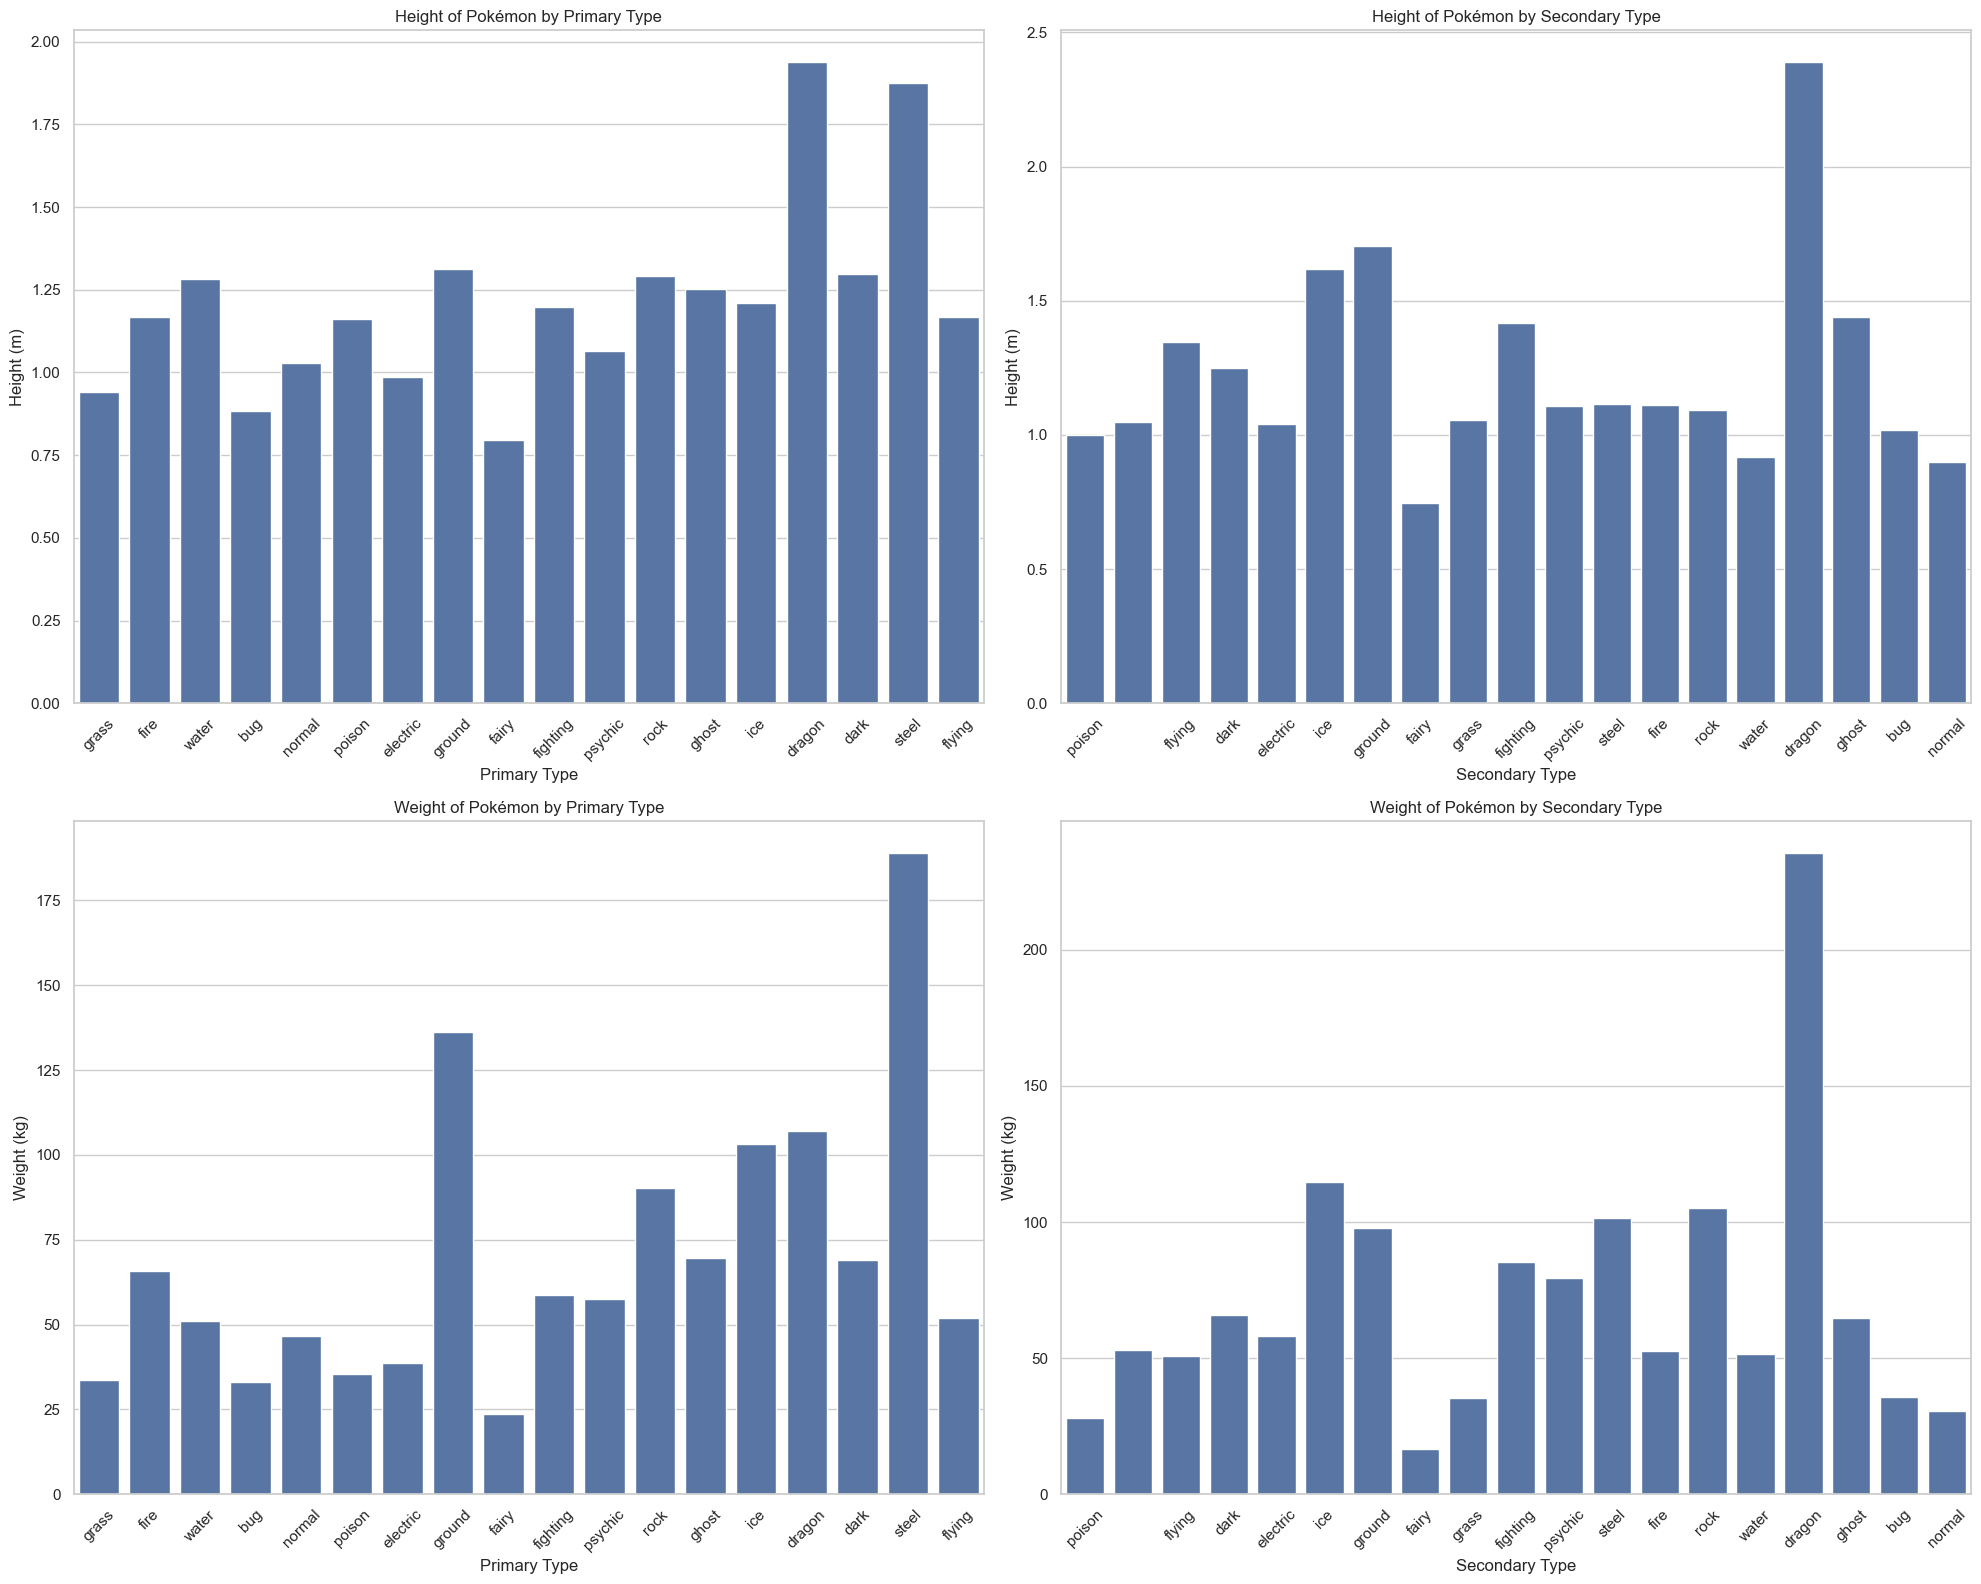

In [21]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))

# Plot heights by primary type
sns.barplot(ax=axes[0, 0], x='type1', y='height_m', data=cd, errorbar=None)
axes[0, 0].set_title('Height of Pokémon by Primary Type')
axes[0, 0].set_xlabel('Primary Type')
axes[0, 0].set_ylabel('Height (m)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot heights by secondary type
sns.barplot(ax=axes[0, 1], x='type2', y='height_m', data=cd, errorbar=None)
axes[0, 1].set_title('Height of Pokémon by Secondary Type')
axes[0, 1].set_xlabel('Secondary Type')
axes[0, 1].set_ylabel('Height (m)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot weights by primary type
sns.barplot(ax=axes[1, 0], x='type1', y='weight_kg', data=cd, errorbar=None)
axes[1, 0].set_title('Weight of Pokémon by Primary Type')
axes[1, 0].set_xlabel('Primary Type')
axes[1, 0].set_ylabel('Weight (kg)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot weights by secondary type
sns.barplot(ax=axes[1, 1], x='type2', y='weight_kg', data=cd, errorbar=None)
axes[1, 1].set_title('Weight of Pokémon by Secondary Type')
axes[1, 1].set_xlabel('Secondary Type')
axes[1, 1].set_ylabel('Weight (kg)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


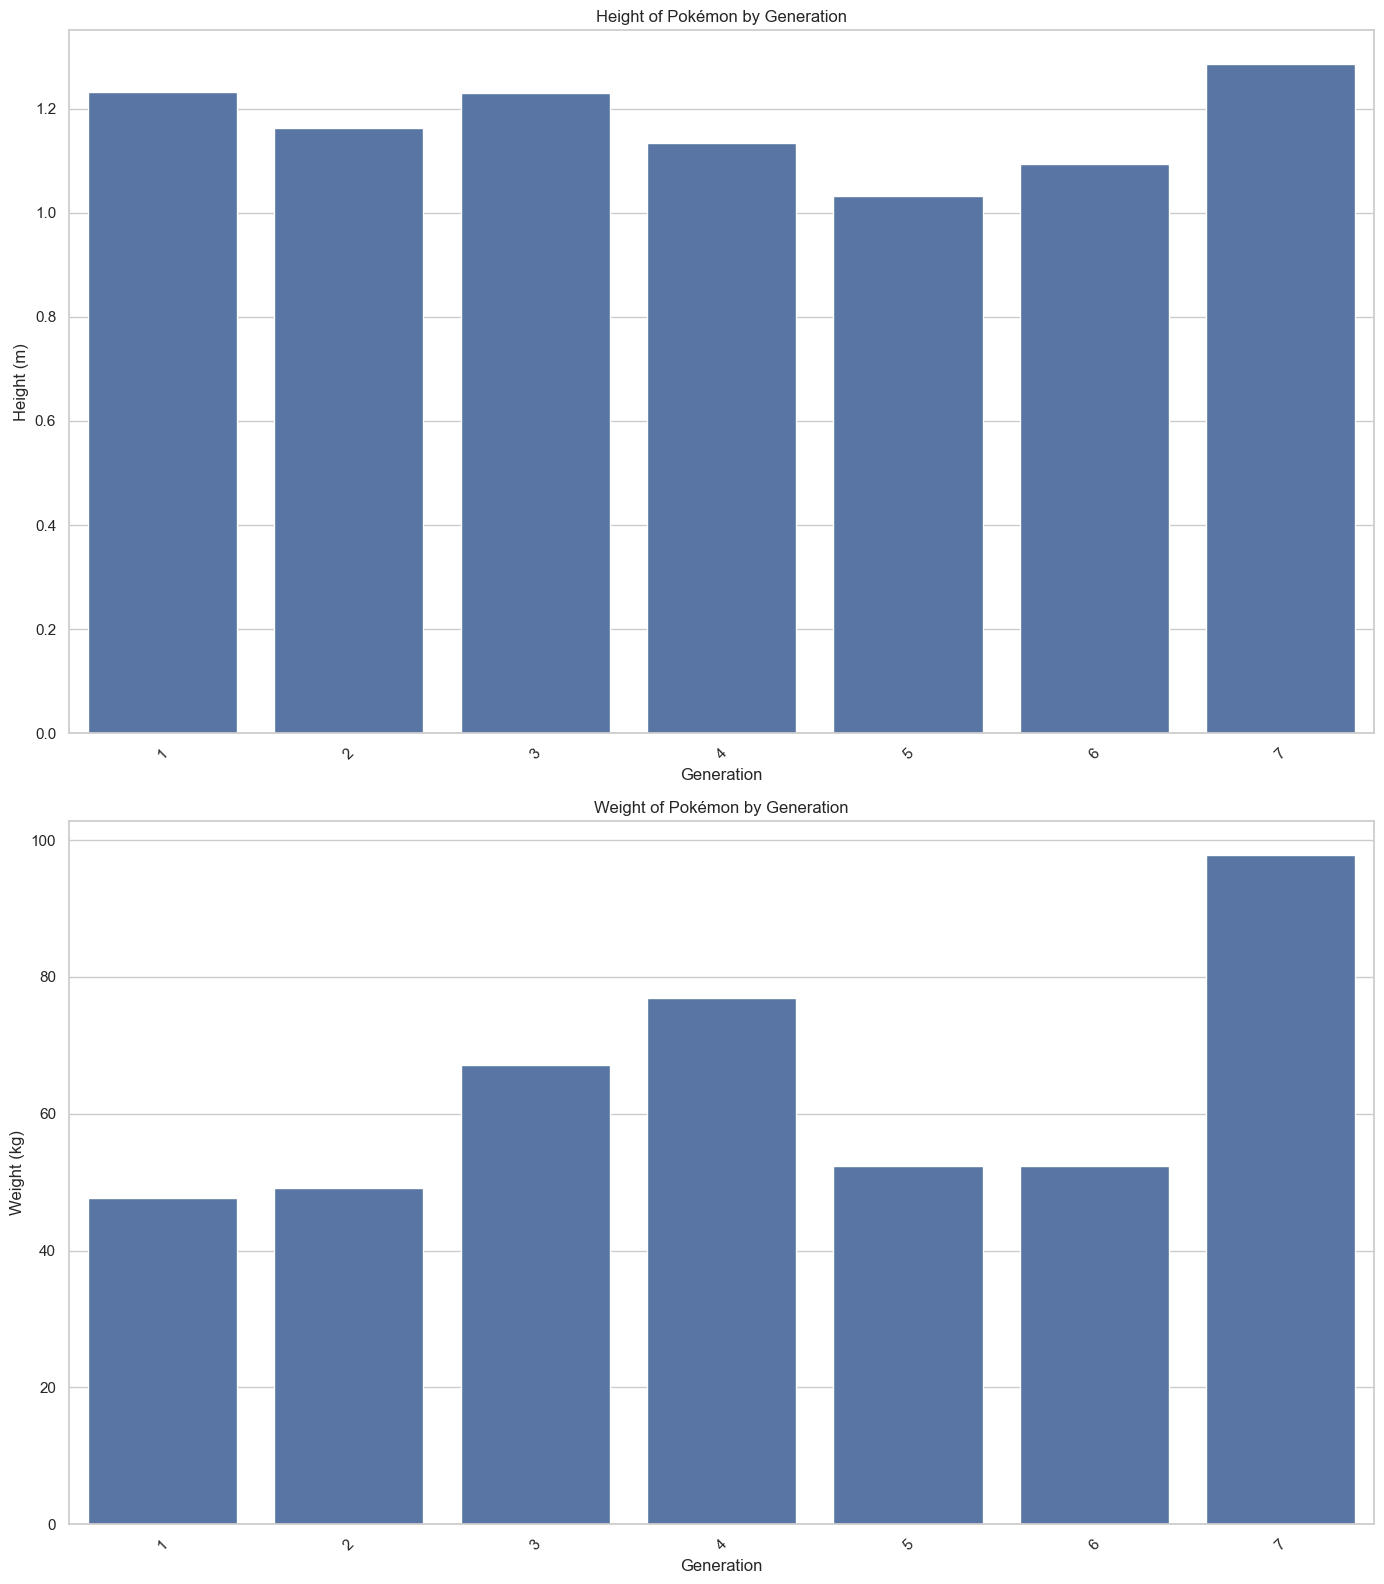

In [22]:
# Combined plot of heights and weights by generation
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 16))

sns.barplot(ax=axes[0], x='generation', y='height_m', data=cd, errorbar=None)
axes[0].set_title('Height of Pokémon by Generation')
axes[0].set_xlabel('Generation')
axes[0].set_ylabel('Height (m)')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1], x='generation', y='weight_kg', data=cd, errorbar=None)
axes[1].set_title('Weight of Pokémon by Generation')
axes[1].set_xlabel('Generation')
axes[1].set_ylabel('Weight (kg)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

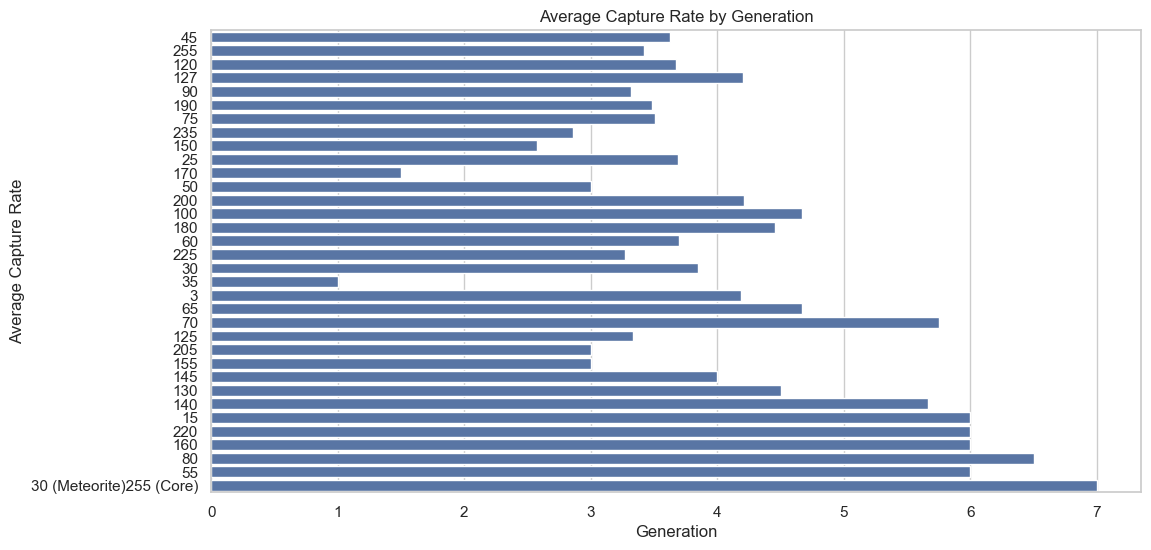

In [23]:
# Plot the average capture rate by generation
plt.figure(figsize=(12, 6))
sns.barplot(x='generation', y='capture_rate', data=cd, errorbar=None)
plt.title('Average Capture Rate by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Capture Rate')
plt.show()


In [24]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

<Axes: >

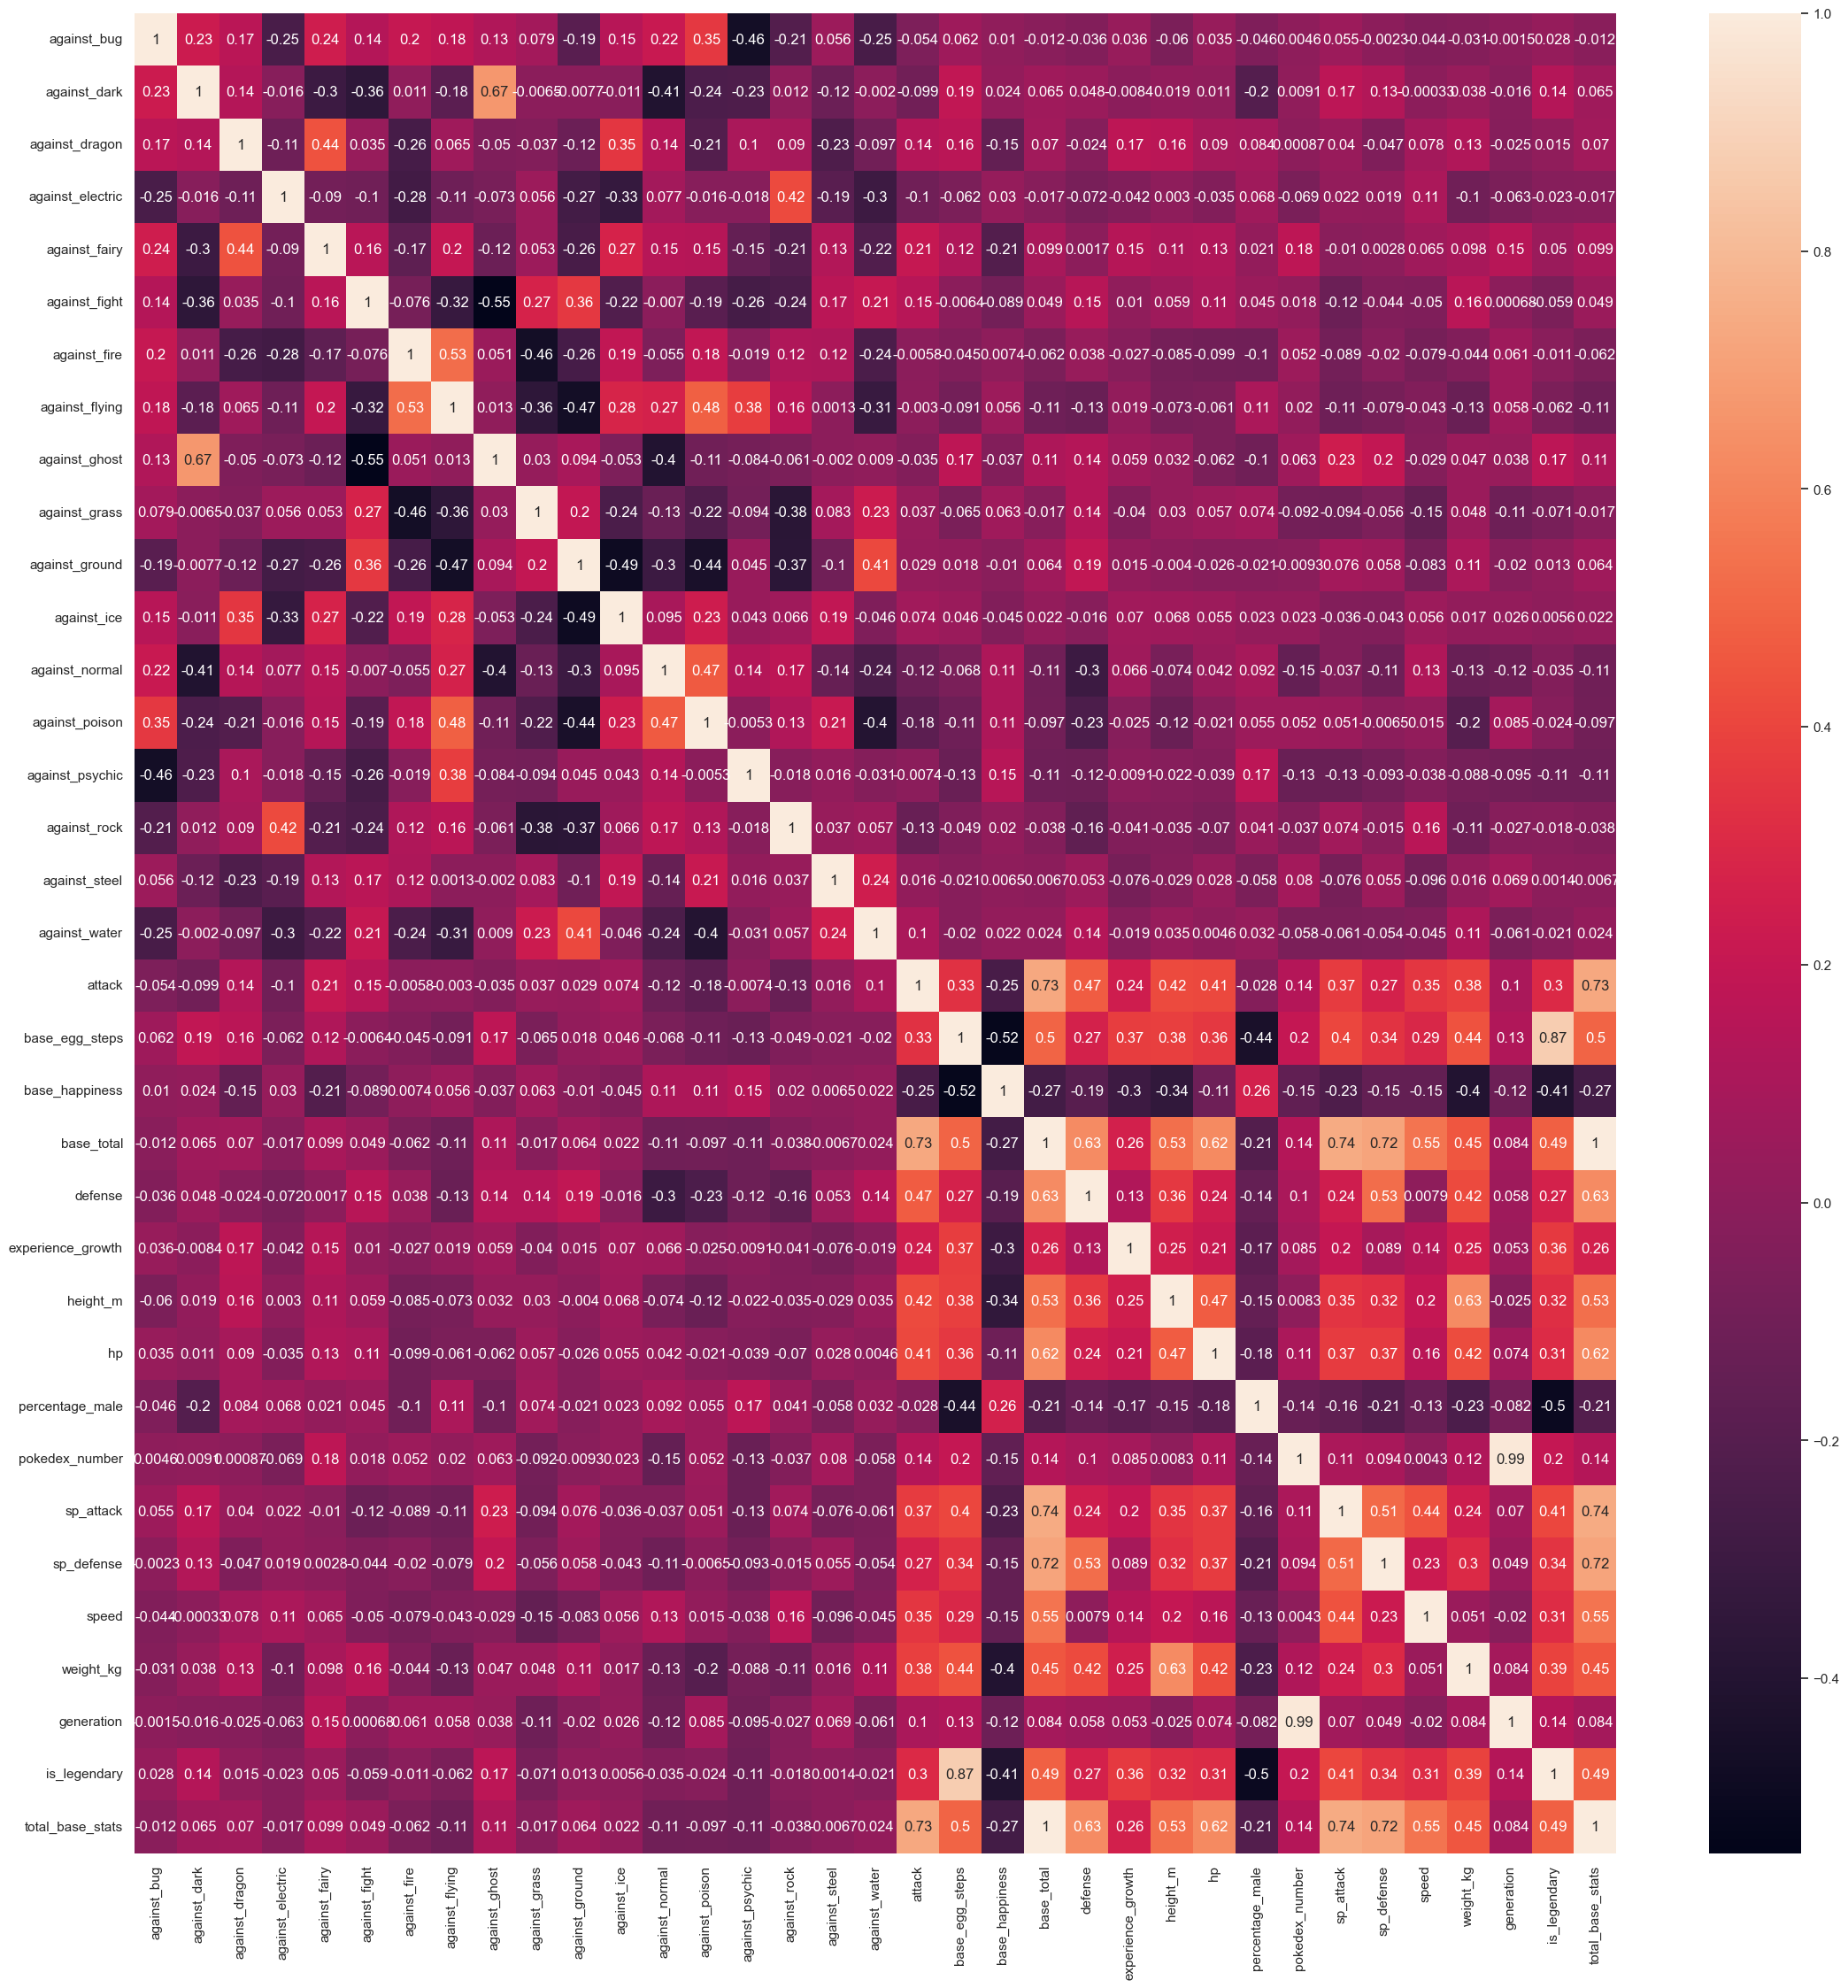

In [25]:
plt.figure(figsize=(27,27))
cd_numeric_column=cd.select_dtypes(exclude='object')
sns.heatmap(cd_numeric_column.corr(),annot=True)

##### Predictive Modeling

Using only base attribute and type of pokemon

Logistic Regression:
Accuracy: 0.91
Precision: 0.75
Recall: 0.33
F1 Score: 0.46

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       143
           1       0.75      0.33      0.46        18

    accuracy                           0.91       161
   macro avg       0.84      0.66      0.71       161
weighted avg       0.90      0.91      0.90       161



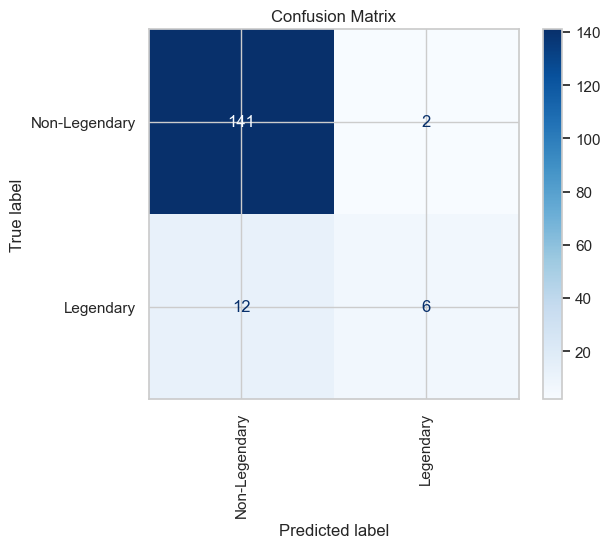


--------------------------------------------------

Decision Tree:
Accuracy: 0.89
Precision: 0.54
Recall: 0.39
F1 Score: 0.45

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       143
           1       0.54      0.39      0.45        18

    accuracy                           0.89       161
   macro avg       0.73      0.67      0.70       161
weighted avg       0.88      0.89      0.89       161



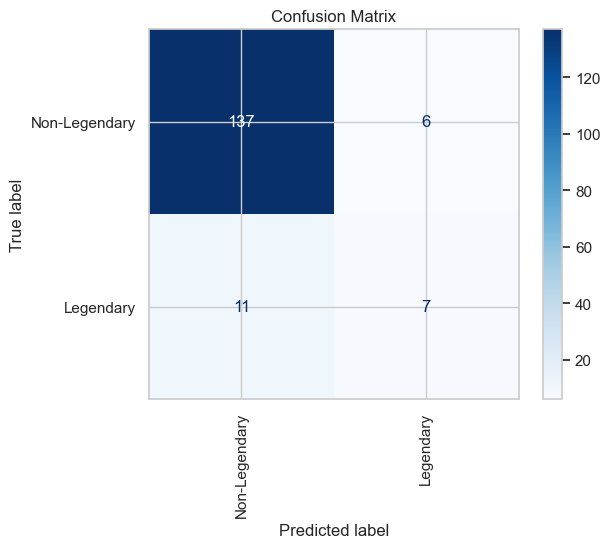


--------------------------------------------------

Random Forest:
Accuracy: 0.92
Precision: 0.86
Recall: 0.33
F1 Score: 0.48

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       143
           1       0.86      0.33      0.48        18

    accuracy                           0.92       161
   macro avg       0.89      0.66      0.72       161
weighted avg       0.91      0.92      0.90       161



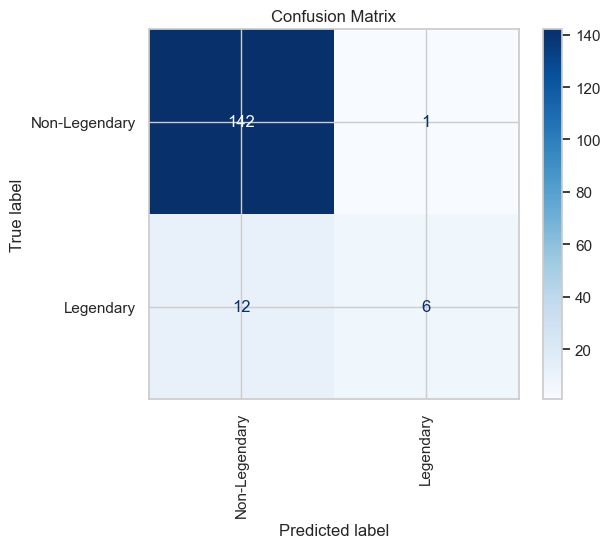


--------------------------------------------------

XGBoost:
Accuracy: 0.93
Precision: 0.80
Recall: 0.44
F1 Score: 0.57

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       143
           1       0.80      0.44      0.57        18

    accuracy                           0.93       161
   macro avg       0.87      0.72      0.77       161
weighted avg       0.92      0.93      0.92       161



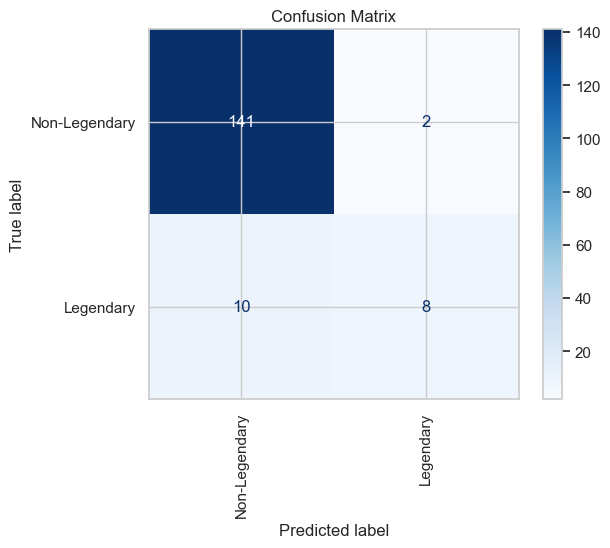


--------------------------------------------------



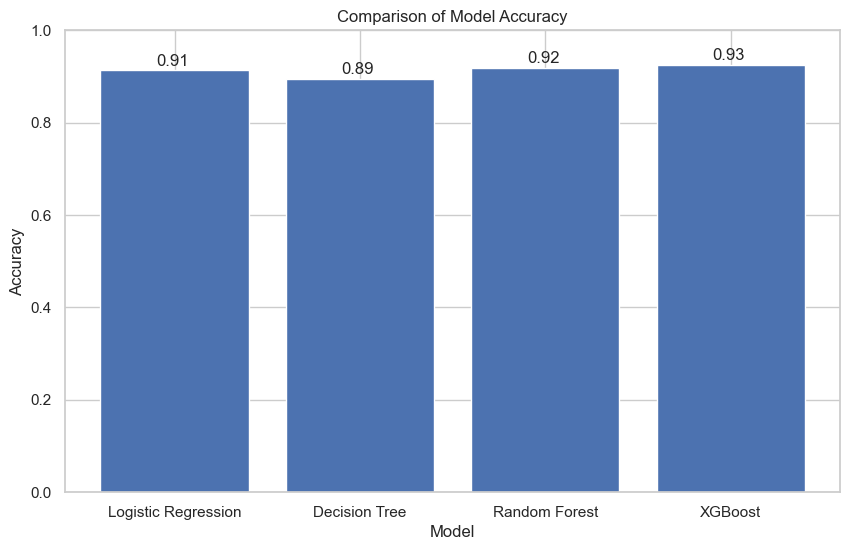

In [47]:
# Select features and target variable
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2']
X = cd[features]
y = cd['is_legendary']


# One-hot encode the categorical features (type1 and type2)
encoder = OneHotEncoder(sparse_output=False)
encoded_types = encoder.fit_transform(X[['type1', 'type2']])
encoded_types_df = pd.DataFrame(encoded_types, columns=encoder.get_feature_names_out(['type1', 'type2']))

# Combine the encoded features with the base stats
X = pd.concat([X[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']], encoded_types_df], axis=1)

# Normalize the numerical features
scaler = StandardScaler()
X[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']] = scaler.fit_transform(X[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and print model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('\nClassification Report:')
    print(classification_report_str)
    
    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Non-Legendary', 'Legendary'], cmap='Blues', xticks_rotation='vertical')
    disp.ax_.set_title('Confusion Matrix')
    plt.show()

    return accuracy

# Define models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Dictionary to store the accuracy scores
accuracy_scores = {}

# Loop through the models, fit, and evaluate each one
for name, model in models:
    print(f"{name}:")
    model.fit(X_train, y_train)
    accuracy= evaluate_model(model, X_test, y_test)
    accuracy_scores[name]= accuracy
    print("\n" + "-"*50 + "\n")


# Create a bar plot for accuracy scores
plt.figure(figsize=(10, 6))
bars=plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0, 1)
# Add accuracy numbers on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.01, round(yval, 2))
plt.show()

Tuning Logistic Regression...
Accuracy: 0.93
Precision: 0.88
Recall: 0.39
F1 Score: 0.54

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       143
           1       0.88      0.39      0.54        18

    accuracy                           0.93       161
   macro avg       0.90      0.69      0.75       161
weighted avg       0.92      0.93      0.91       161



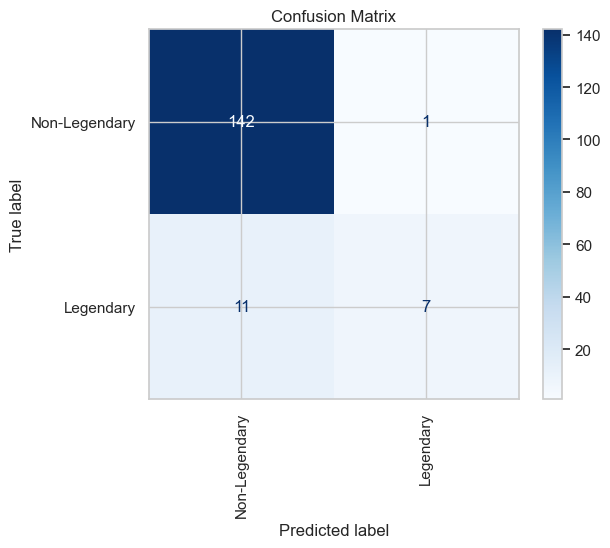

Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}

--------------------------------------------------

Tuning Decision Tree...
Accuracy: 0.93
Precision: 0.80
Recall: 0.44
F1 Score: 0.57

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       143
           1       0.80      0.44      0.57        18

    accuracy                           0.93       161
   macro avg       0.87      0.72      0.77       161
weighted avg       0.92      0.93      0.92       161



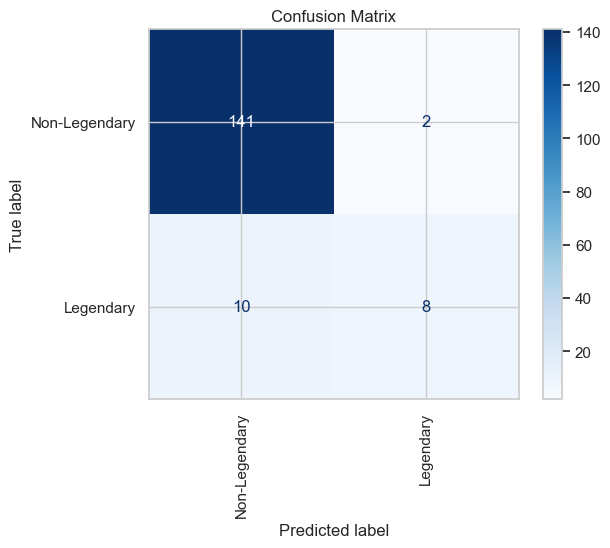

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

--------------------------------------------------

Tuning Random Forest...
Accuracy: 0.92
Precision: 0.86
Recall: 0.33
F1 Score: 0.48

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       143
           1       0.86      0.33      0.48        18

    accuracy                           0.92       161
   macro avg       0.89      0.66      0.72       161
weighted avg       0.91      0.92      0.90       161



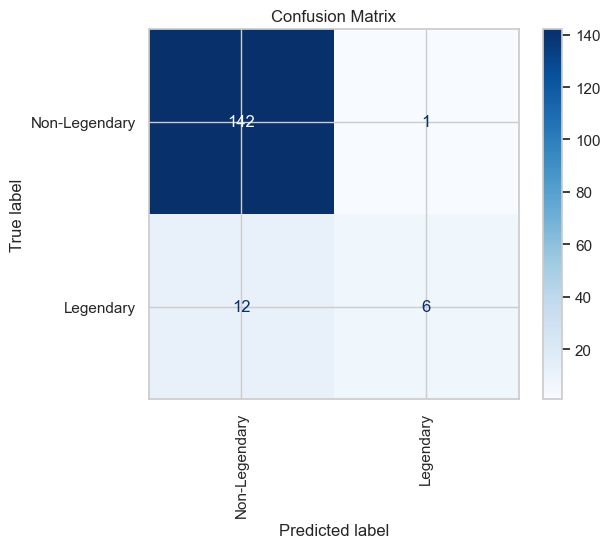

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

--------------------------------------------------

Tuning XGBoost...
Accuracy: 0.92
Precision: 0.78
Recall: 0.39
F1 Score: 0.52

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       143
           1       0.78      0.39      0.52        18

    accuracy                           0.92       161
   macro avg       0.85      0.69      0.74       161
weighted avg       0.91      0.92      0.91       161



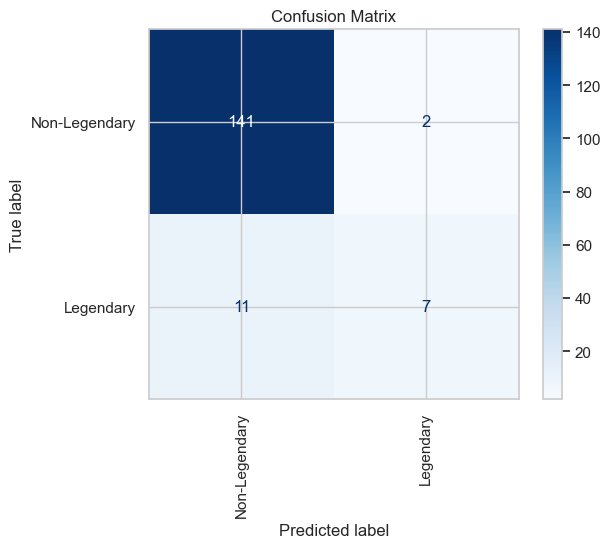

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

--------------------------------------------------



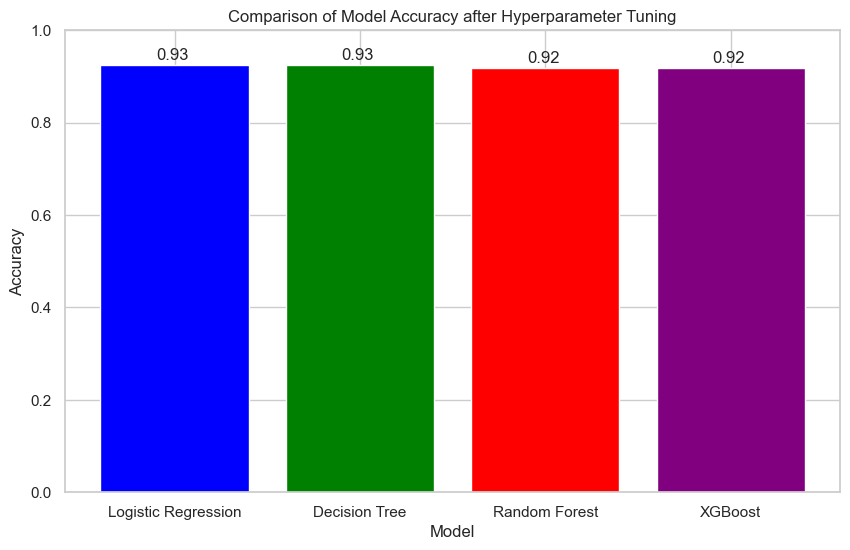

In [50]:
# Select features and target variable
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2']
X = cd[features]
y = cd['is_legendary']

# One-hot encode the categorical features (type1 and type2)
encoder = OneHotEncoder(sparse_output=False)
encoded_types = encoder.fit_transform(X[['type1', 'type2']])
encoded_types_df = pd.DataFrame(encoded_types, columns=encoder.get_feature_names_out(['type1', 'type2']))

# Combine the encoded features with the base stats
X = pd.concat([X[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']], encoded_types_df], axis=1)

# Normalize the numerical features
scaler = StandardScaler()
X[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']] = scaler.fit_transform(X[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and print model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('\nClassification Report:')
    print(classification_report_str)
    
    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Non-Legendary', 'Legendary'], cmap='Blues', xticks_rotation='vertical')
    disp.ax_.set_title('Confusion Matrix')
    plt.show()

    return accuracy

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10],
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0],
    }
}

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store the accuracy scores
accuracy_scores = {}

# Loop through the models, perform GridSearchCV, fit, and evaluate each one
for name, model in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    accuracy = evaluate_model(best_model, X_test, y_test)
    accuracy_scores[name] = accuracy
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print("\n" + "-"*50 + "\n")

# Create a bar plot for accuracy scores
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy after Hyperparameter Tuning')
plt.ylim(0, 1)

# Add accuracy numbers on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.01, round(yval, 2))

plt.show()


Logistic Regression:
Accuracy: 0.99
Precision: 1.00
Recall: 0.94
F1 Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.94      0.97        18

    accuracy                           0.99       161
   macro avg       1.00      0.97      0.98       161
weighted avg       0.99      0.99      0.99       161



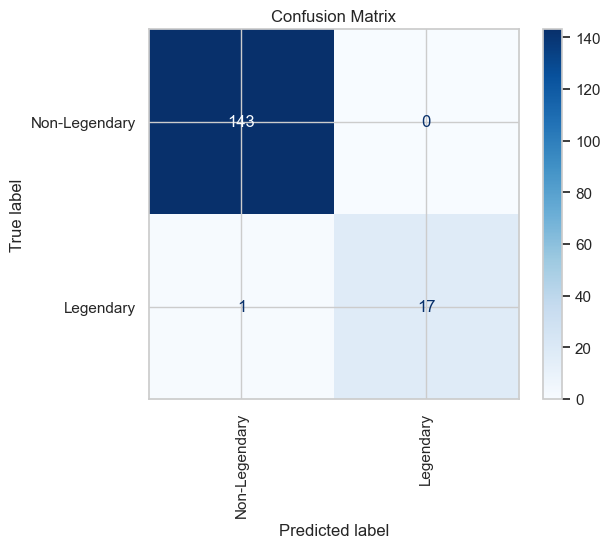


--------------------------------------------------

Decision Tree:
Accuracy: 0.99
Precision: 0.95
Recall: 1.00
F1 Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       143
           1       0.95      1.00      0.97        18

    accuracy                           0.99       161
   macro avg       0.97      1.00      0.98       161
weighted avg       0.99      0.99      0.99       161



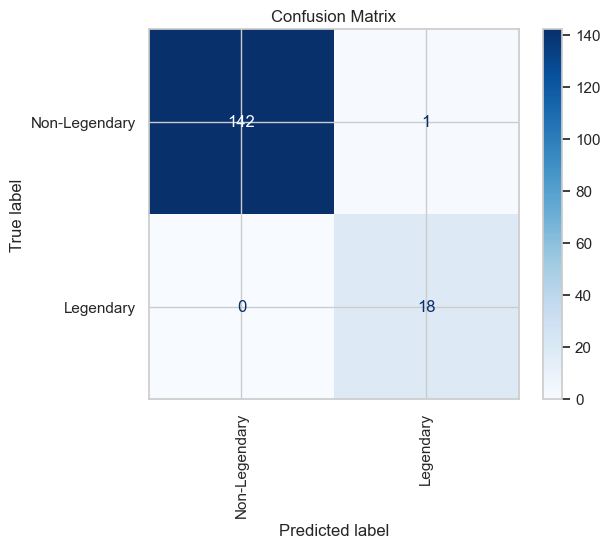


--------------------------------------------------

Random Forest:
Accuracy: 0.99
Precision: 1.00
Recall: 0.94
F1 Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.94      0.97        18

    accuracy                           0.99       161
   macro avg       1.00      0.97      0.98       161
weighted avg       0.99      0.99      0.99       161



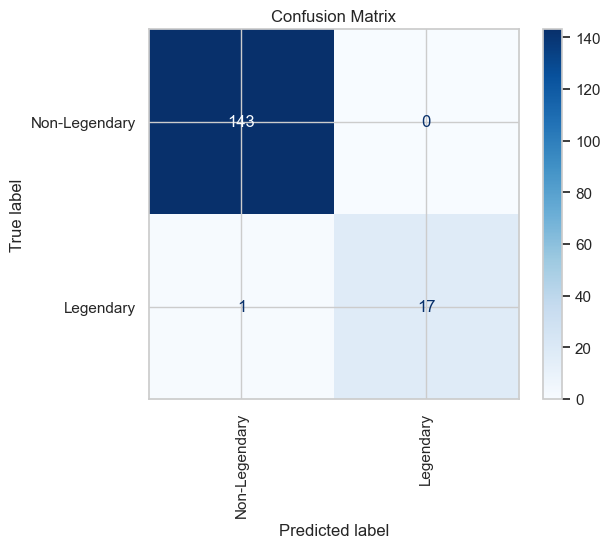


--------------------------------------------------

XGBoost:
Accuracy: 0.99
Precision: 1.00
Recall: 0.94
F1 Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.94      0.97        18

    accuracy                           0.99       161
   macro avg       1.00      0.97      0.98       161
weighted avg       0.99      0.99      0.99       161



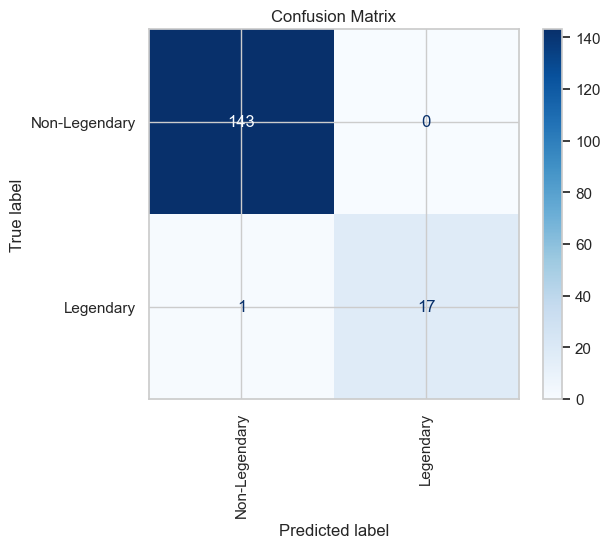


--------------------------------------------------



In [51]:
# Select features and target variable
numeric_features = cd.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['type1', 'type2']
features = numeric_features + categorical_features

# Ensure all numeric features except the target variable are included
numeric_features.remove('is_legendary')

X = cd[features]
y = cd['is_legendary']

# One-hot encode the categorical features (type1 and type2)
encoder = OneHotEncoder(sparse_output=False)
encoded_types = encoder.fit_transform(X[['type1', 'type2']])
encoded_types_df = pd.DataFrame(encoded_types, columns=encoder.get_feature_names_out(['type1', 'type2']))

# Combine the encoded features with the numerical features
X = pd.concat([X[numeric_features], encoded_types_df], axis=1)

# Normalize the numerical features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and print model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('\nClassification Report:')
    print(classification_report_str)
    
    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Non-Legendary', 'Legendary'], cmap='Blues', xticks_rotation='vertical')
    disp.ax_.set_title('Confusion Matrix')
    plt.show()

# Define models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Loop through the models, fit, and evaluate each one
for name, model in models:
    print(f"{name}:")
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    print("\n" + "-"*50 + "\n")


Tuning Logistic Regression...
Accuracy: 0.99
Precision: 0.94
Recall: 0.94
F1 Score: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.94      0.94      0.94        18

    accuracy                           0.99       161
   macro avg       0.97      0.97      0.97       161
weighted avg       0.99      0.99      0.99       161



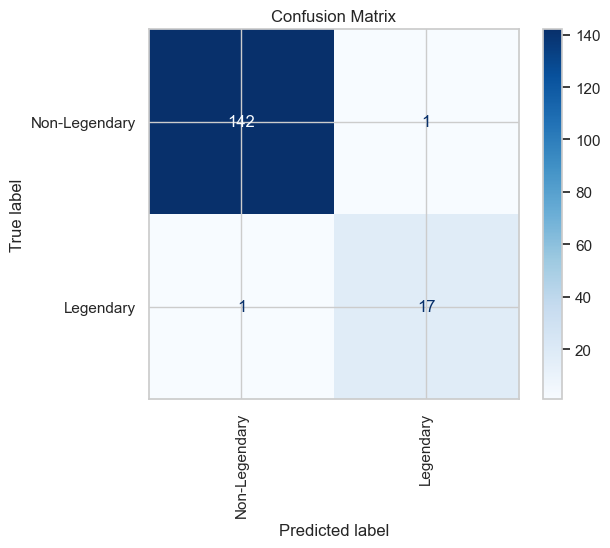

Best Parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}

--------------------------------------------------

Tuning Decision Tree...
Accuracy: 0.99
Precision: 1.00
Recall: 0.89
F1 Score: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       143
           1       1.00      0.89      0.94        18

    accuracy                           0.99       161
   macro avg       0.99      0.94      0.97       161
weighted avg       0.99      0.99      0.99       161



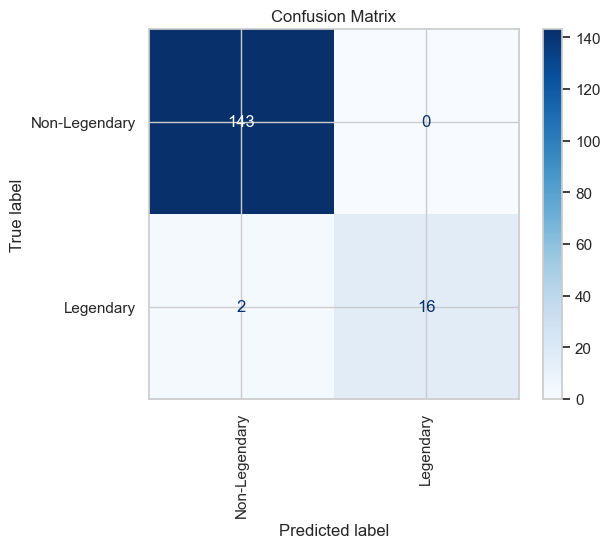

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

--------------------------------------------------

Tuning Random Forest...
Accuracy: 0.99
Precision: 1.00
Recall: 0.94
F1 Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.94      0.97        18

    accuracy                           0.99       161
   macro avg       1.00      0.97      0.98       161
weighted avg       0.99      0.99      0.99       161



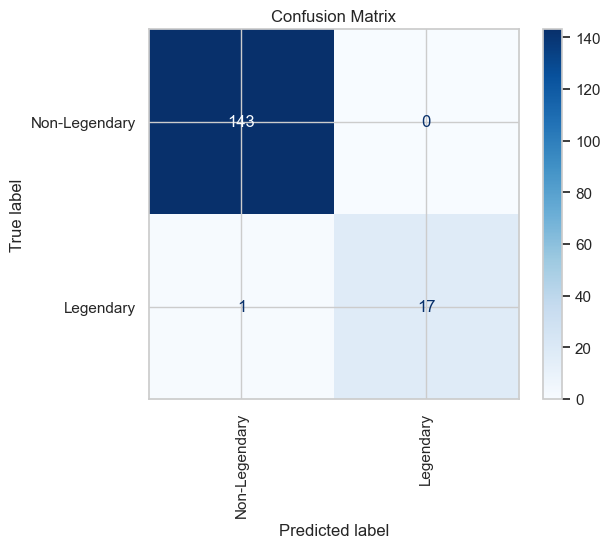

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

--------------------------------------------------

Tuning XGBoost...
Accuracy: 0.99
Precision: 1.00
Recall: 0.94
F1 Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.94      0.97        18

    accuracy                           0.99       161
   macro avg       1.00      0.97      0.98       161
weighted avg       0.99      0.99      0.99       161



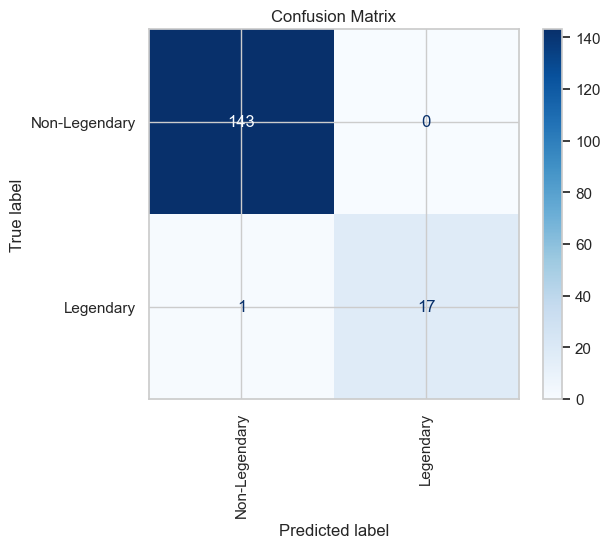

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

--------------------------------------------------



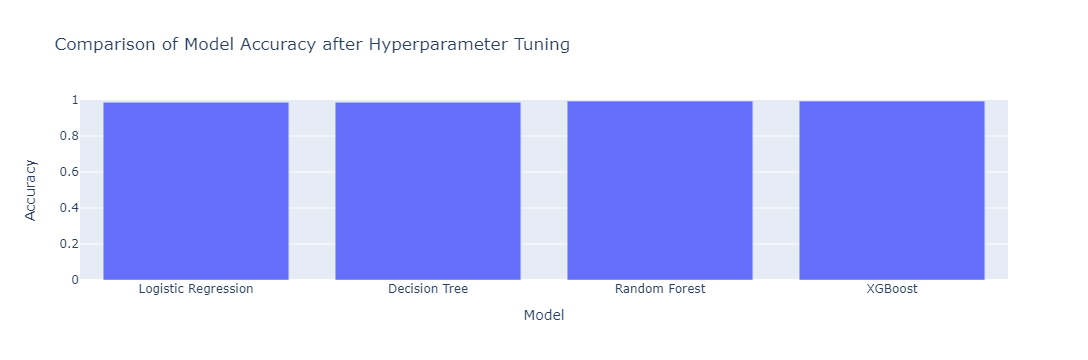

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = cd

# Fill missing values in type2 with 'None'
df['type2'].fillna('None', inplace=True)

# Select features and target variable
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['type1', 'type2']
features = numeric_features + categorical_features

# Ensure all numeric features except the target variable are included
numeric_features.remove('is_legendary')

X = df[features]
y = df['is_legendary']

# One-hot encode the categorical features (type1 and type2)
encoder = OneHotEncoder(sparse_output=False)
encoded_types = encoder.fit_transform(X[['type1', 'type2']])
encoded_types_df = pd.DataFrame(encoded_types, columns=encoder.get_feature_names_out(['type1', 'type2']))

# Combine the encoded features with the numerical features
X = pd.concat([X[numeric_features], encoded_types_df], axis=1)

# Normalize the numerical features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and print model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('\nClassification Report:')
    print(classification_report_str)
    
    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Non-Legendary', 'Legendary'], cmap='Blues', xticks_rotation='vertical')
    disp.ax_.set_title('Confusion Matrix')
    plt.show()

    return accuracy

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10],
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0],
    }
}

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store the accuracy scores
accuracy_scores = {}

# Loop through the models, perform GridSearchCV, fit, and evaluate each one
for name, model in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    accuracy = evaluate_model(best_model, X_test, y_test)
    accuracy_scores[name] = accuracy
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print("\n" + "-"*50 + "\n")

# Create a bar plot for accuracy scores using Plotly
import plotly.express as px

accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
fig = px.bar(accuracy_df, x='Model', y='Accuracy', title='Comparison of Model Accuracy after Hyperparameter Tuning',
             text=accuracy_df['Accuracy'].round(2), range_y=[0, 1])

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


Checking for overfitting

Plotting learning curve for Logistic Regression


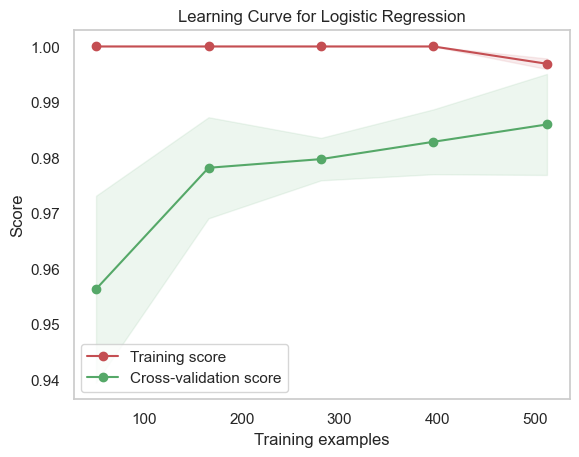

Plotting learning curve for Decision Tree


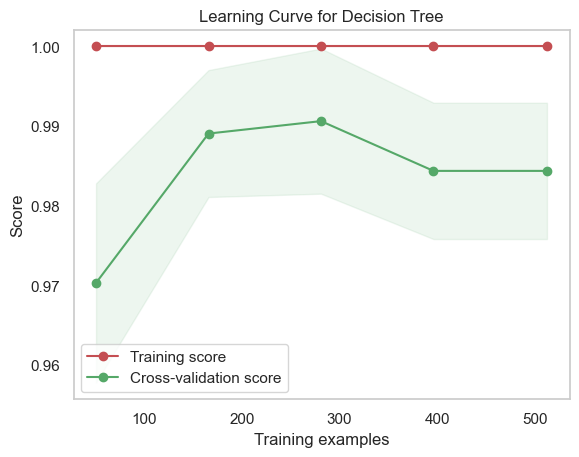

Plotting learning curve for Random Forest


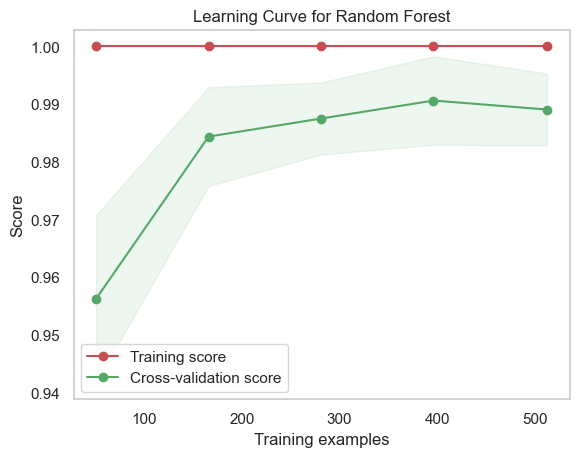

Plotting learning curve for XGBoost


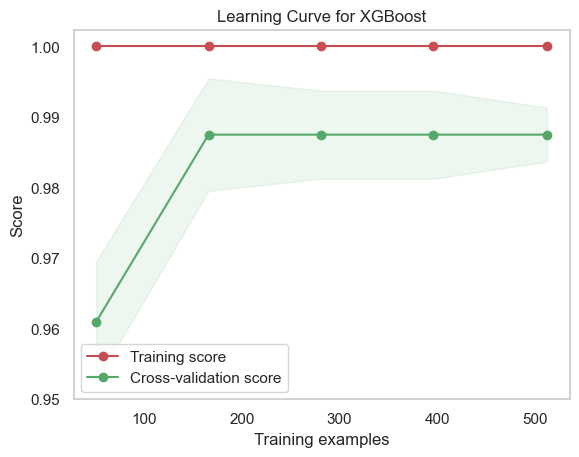

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import xgboost as xgb

# Load the dataset
df = cd

# Fill missing values in type2 with 'None'
df['type2'].fillna('None', inplace=True)

# Select features and target variable
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['type1', 'type2']
features = numeric_features + categorical_features

# Ensure all numeric features except the target variable are included
numeric_features.remove('is_legendary')

X = df[features]
y = df['is_legendary']

# One-hot encode the categorical features (type1 and type2)
encoder = OneHotEncoder(sparse_output=False)
encoded_types = encoder.fit_transform(X[['type1', 'type2']])
encoded_types_df = pd.DataFrame(encoded_types, columns=encoder.get_feature_names_out(['type1', 'type2']))

# Combine the encoded features with the numerical features
X = pd.concat([X[numeric_features], encoded_types_df], axis=1)

# Normalize the numerical features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot learning curves
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for each model
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

for name, model in models:
    print(f"Plotting learning curve for {name}")
    plot_learning_curve(model, X_train, y_train, title=f"Learning Curve for {name}")
    plt.show()


Optimal team maker

In [28]:
effectiveness_features = [col for col in df.columns if col.startswith('against_')]
effectiveness_df = df[effectiveness_features]
df['battle_strength'] = df['attack'] + df['defense'] + df['sp_attack'] + df['sp_defense'] + df['speed'] + df['hp']
# A function to calculate synergy score for a team
def calculate_synergy_score(team, effectiveness_df):
    synergy_score = 0
    for i, poke1 in enumerate(team):
        for j, poke2 in enumerate(team):
            if i < j:
                synergy_score += (effectiveness_df.loc[poke1] * effectiveness_df.loc[poke2]).sum()
    return synergy_score

# Greedy algorithm to select a team of 6 Pokémon
def select_team(df, effectiveness_df, n=6):
    team = []
    remaining_pokemon = df.index.tolist()
    while len(team) < n:
        best_pokemon = None
        best_synergy = -np.inf
        for pokemon in remaining_pokemon:
            current_team = team + [pokemon]
            current_synergy = calculate_synergy_score(current_team, effectiveness_df)
            if current_synergy > best_synergy:
                best_synergy = current_synergy
                best_pokemon = pokemon
        team.append(best_pokemon)
        remaining_pokemon.remove(best_pokemon)
    return team

# Select the optimal team
optimal_team = select_team(df, effectiveness_df)
print("Optimal Team:", df.loc[optimal_team, 'name'].values)


Optimal Team: ['Bulbasaur' 'Paras' 'Parasect' 'Wormadam' 'Sewaddle' 'Swadloon']
